# Bin Packing Lab

- Authors:
  - Nivetha Kuruparan, kuruparn@mcmaster.ca
  - Tanveer Brar, brart5@mcmaster.ca
- Group ID on Avenue: 20
- Gitlab URL: https://gitlab.cas.mcmaster.ca/brart5/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [1]:
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [3]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[14, 13, 13, 12, 8, 8], [20, 19, 18, 17, 15], [37, 30, 23], [39, 37], [43, 40], [44, 43], [50, 44], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [5]:
strategy: Online = online.NextFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 36
[[13, 61], [15, 70], [19], [20, 23], [37, 43, 14], [39], [40, 8, 18], [43], [44], [44, 50], [51, 30], [61], [62], [62, 37], [63, 17, 13], [66], [67], [69], [71], [72], [75], [76], [76, 8, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


As expected, the online version is worst!

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

## T1 Tasks

##### For the code, explain how it follows the SOLID principles.

The design and structure of the code allow it to follow all of the SOLID principles. Down below is a description of how the code follows each principle.

For The Single Responsibility Principle, all classes in the code base only do one task. For instance, when creating an online algorithm, rather than having multiple functions in that one class that defines the algorithms, the code base separates them into multiple classes. Since there are multiple ways to pack bins online way, it is best to create separate classes to separate the responsibilities (algorithms). 

The Open-Closed Principle requires that classes should be open for extension and closed for modification. This can be seen in the code base as we can easily add new functionality (new offline or online algorithms or new type of dataset reader) without having to modify the existing code. The program also uses interfaces to allow it to be open-closed. 

The Liskov Substitution Principle explains that subclasses should be substitutable for their base classes. This can be seen in the code base as the Online and Offline models are used in the algorithms. All algorithms can inherit from their respective parent class. In addition, the child classes can extend the behaviour as well.

The Interface Segregation Principle requires interfaces to be separate. This can be seen in the code base as both the BinPacker and DatasetReader are kept separate as they have different responsibilities. 

Finally, the Dependency Inversion Principle states that all classes should not depend on concrete classes and functions. As mentioned above the code base depends on interfaces when creating new readers or algorithms.

##### For the dataset, explain the different dimensions used and why they are important for evaluating algorithms. 

There are three different "types" of datasets given to us. The first is in the folder binpp, where there are multiple files with the naming convention N#C#W#. This states the following parameters:

N -> number of items (# = 1, numitems = 50) (# = 2, numitems = 100)
C -> bin capacity (# = 1, capacity = 100) (# = 2, capacity = 120)
W -> weights (# = 1, weights range from 1 - 100) (# = 2, weights range from 20 - 100)

Each file then contains a stream of inputs where the first line contains the number of items, the second line contains the capacity of the bins, and the rest of the lines are all possible weights.

This similar structure can be seen in the files for binpp-hard except for the naming convention.

The jburkardt folder is slightly different from the other two as it separates the capacity and weights into separate files. In addition, it does not state how many weights there are. 

These dimensions (capacity and weights) are extremely important for evaluating algorithms as it is the piece of information needed to create them. The algorithms take the capacity and weights and based on their type, will pack them accordingly. The dataset also contains the optimal solution for each dataset, allowing us to see how each algorithm performed. A comparison between algorithms can be made which can help in terms of evaluation.

##### Implement a new DatasetReader, to support the cases stored in the jburkardt directory.

In [6]:
from macpacking.reader import JburkardtReader

capacity_dataset = '_datasets\jburkardt\p01_c.txt'
weights_dataset = '_datasets\jburkardt\p01_w.txt'
jburkardt_reader: DatasetReader = JburkardtReader(capacity_dataset, weights_dataset)
print(f'  - Bin Capacity: {jburkardt_reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(jburkardt_reader.offline()[1])}')

  - Bin Capacity: 100
  - Objects to pack: [3, 7, 11, 33, 33, 33, 50, 60, 70]


##### Implement the most terrible online bin packing algorithm that can ever exist: this algorithm uses one bin per object.

In [7]:
strategy: Online = online.OneFit()
result = strategy(jburkardt_reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 9
[[3], [7], [11], [33], [33], [33], [50], [60], [70]]


##### Integrate it in the class hierarchy.

![t1_class_heirarchy](uml/t1_class_hierarchy.png)

## T2 Tasks

##### Provide an implementation of the following algorithms:

###### Online: First-Fit

In [8]:
strategy: Online = online.FirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44], [44, 43, 13], [50, 43], [51, 39], [61, 13, 20], [61, 37], [62, 23, 15], [62, 37], [63], [66, 30], [67], [69, 8, 18], [70], [71], [72, 14, 12], [75], [76], [76], [79, 19], [83], [83, 17], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Online: Best-Fit

In [9]:
strategy: Online = online.BestFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44, 12], [44, 43, 13], [50, 43], [51], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67, 30], [69, 17, 14], [70, 18, 8], [71], [72, 23], [75], [76], [76, 19], [79, 20], [83, 13], [83, 15], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Online: Worst-Fit

In [10]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 33
[[37, 43], [39, 19], [40, 8, 18, 13], [44, 43], [44, 50], [51, 30], [61, 13], [61, 20], [62, 23], [62, 37], [63, 17], [66, 15], [67, 14], [69, 8], [70, 12], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: First-Fit Decreasing

In [11]:
strategy: Offline = offline.FirstFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71, 13], [72, 14, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: Best-Fit Decreasing

In [12]:
strategy: Offline = offline.BestFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: Worst-Fit Decreasing

In [13]:
strategy: Offline = offline.WorstFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 39], [43, 43], [50, 44], [51, 44], [61, 37], [61, 37], [62, 23], [62, 30], [63, 20], [66, 19], [67, 18], [69, 17], [70, 15], [71, 14], [72, 13], [75, 13], [76, 8], [76, 12], [79, 8], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


##### Implement a way to evaluate a given solution, by measuring KPIs related to number of bins used, and any other things that can be useful to characterize a solution.

Benchmarking for Online Algorithms:


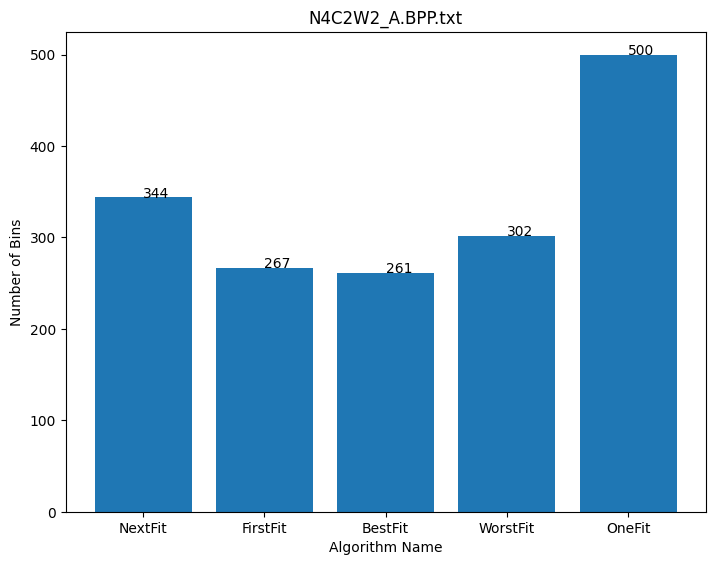

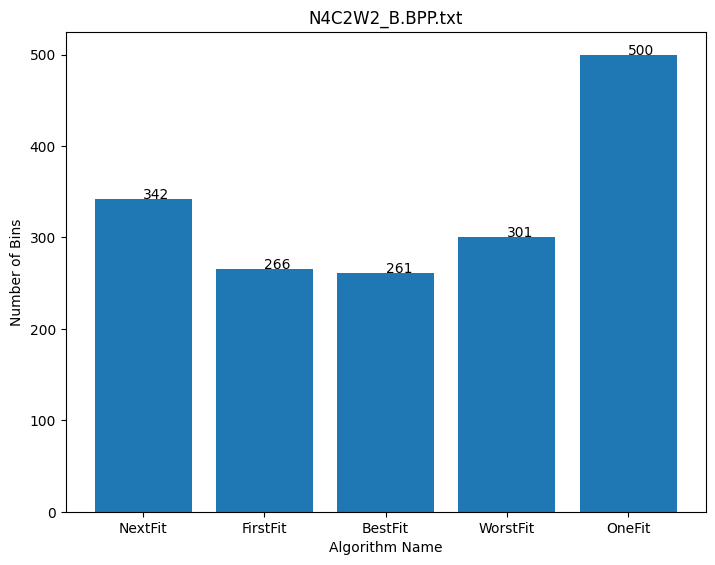

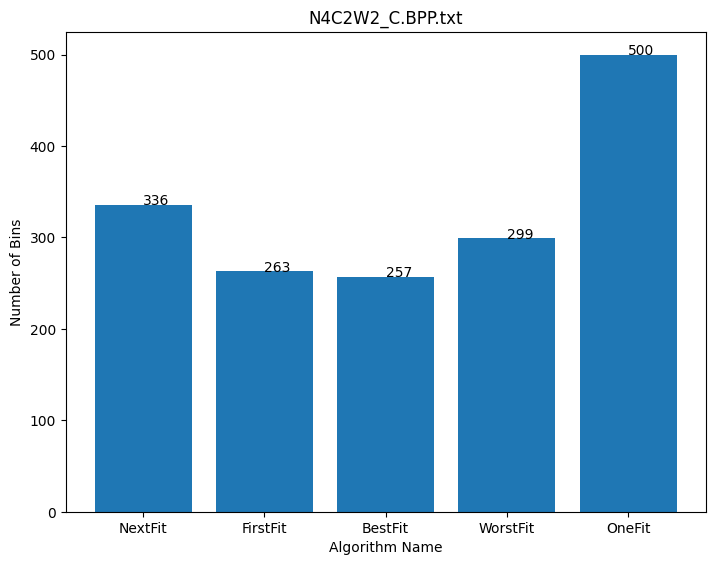

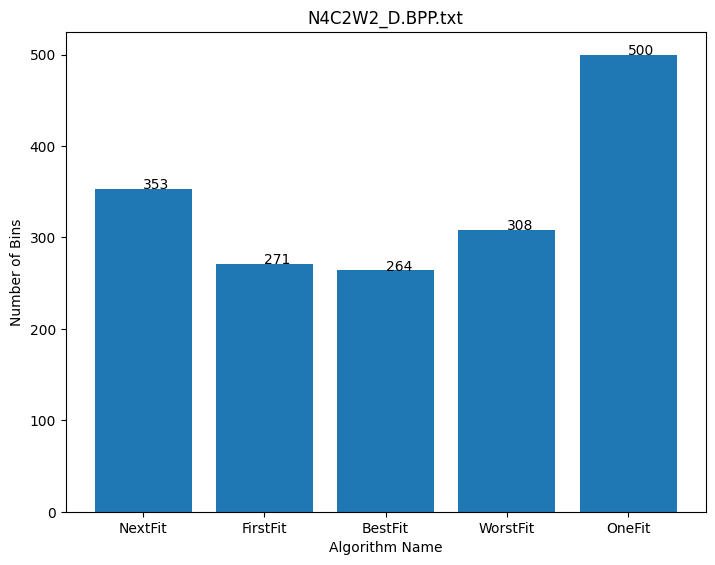

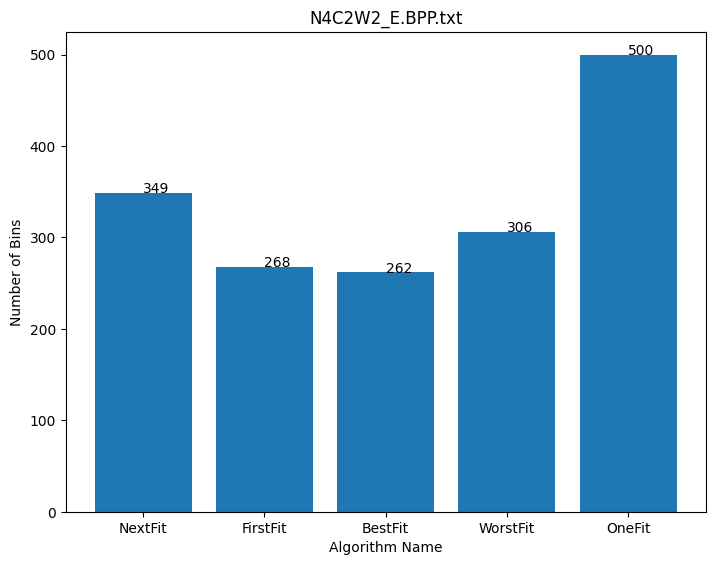

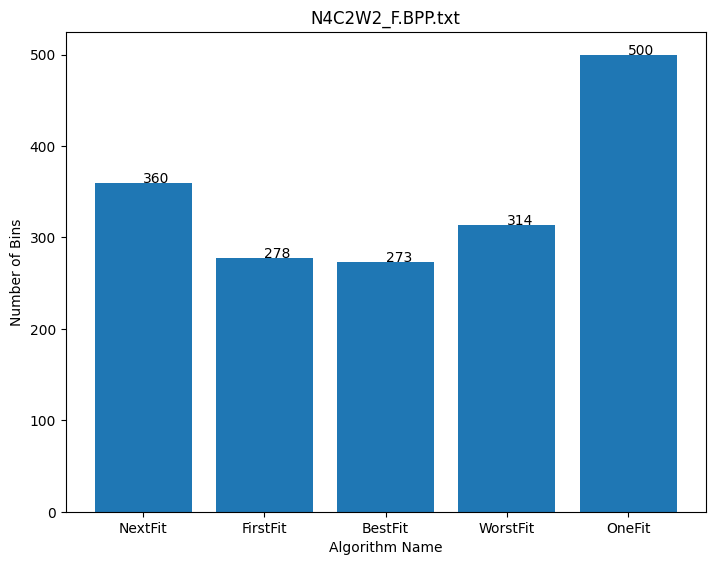

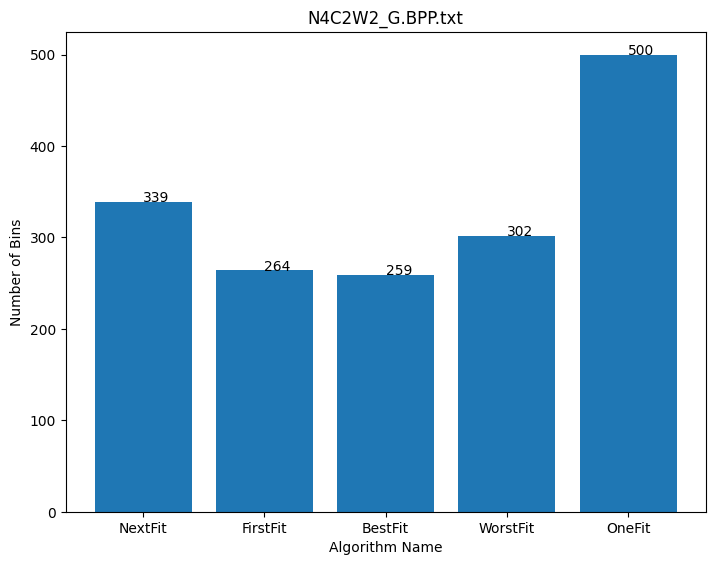

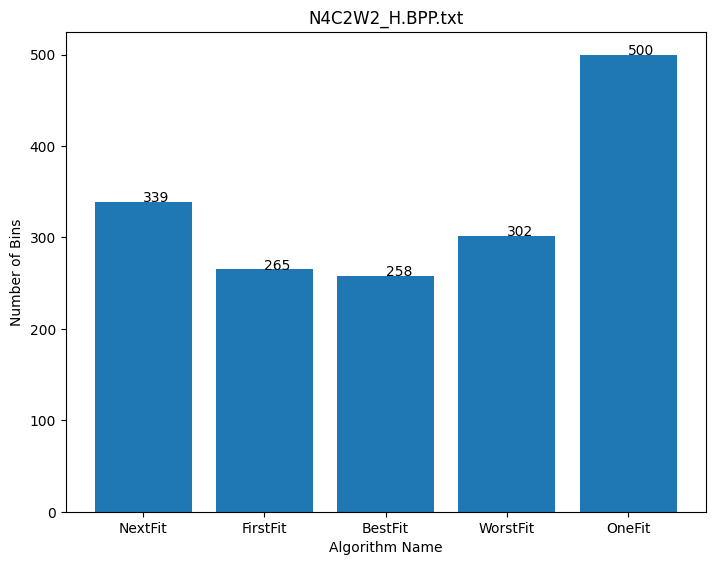

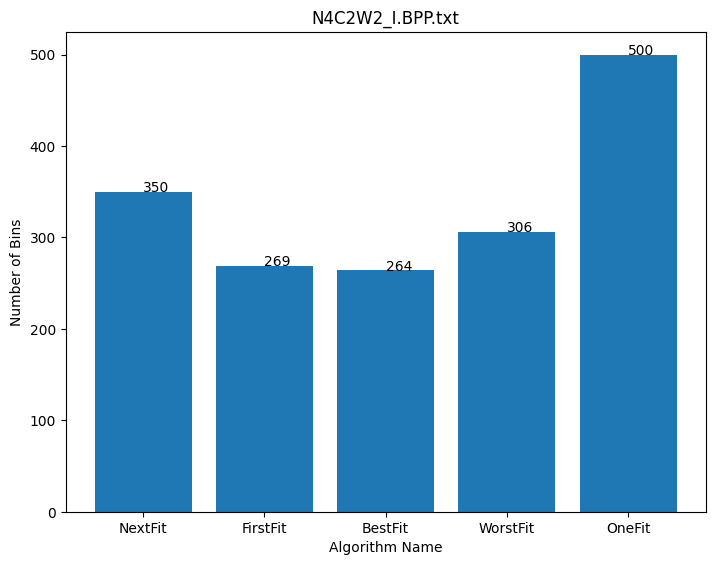

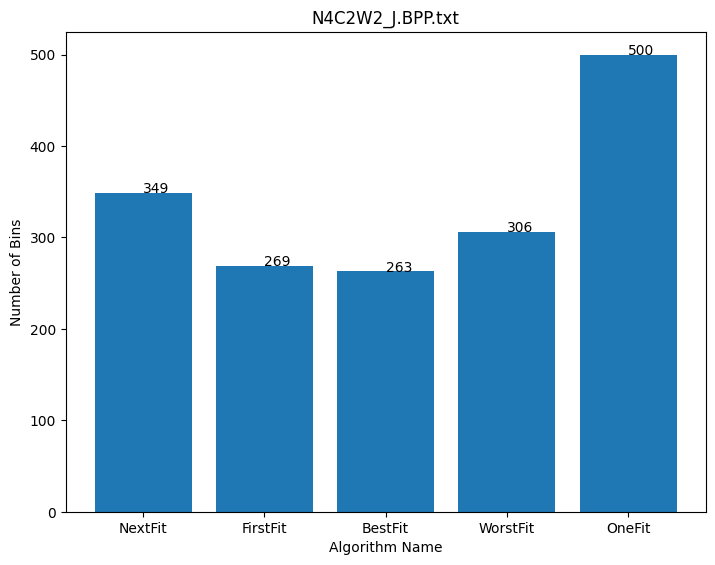

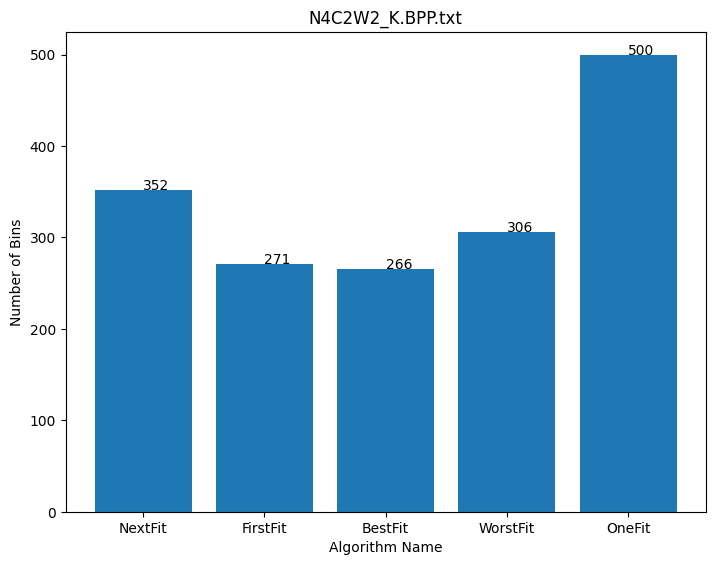

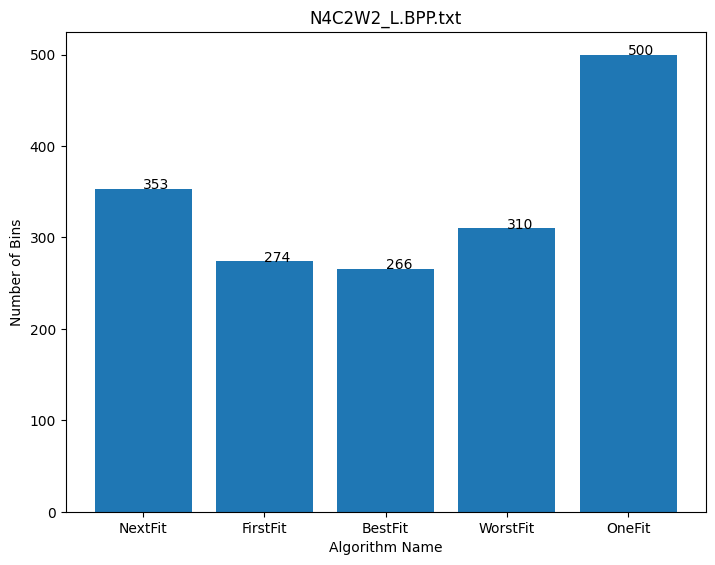

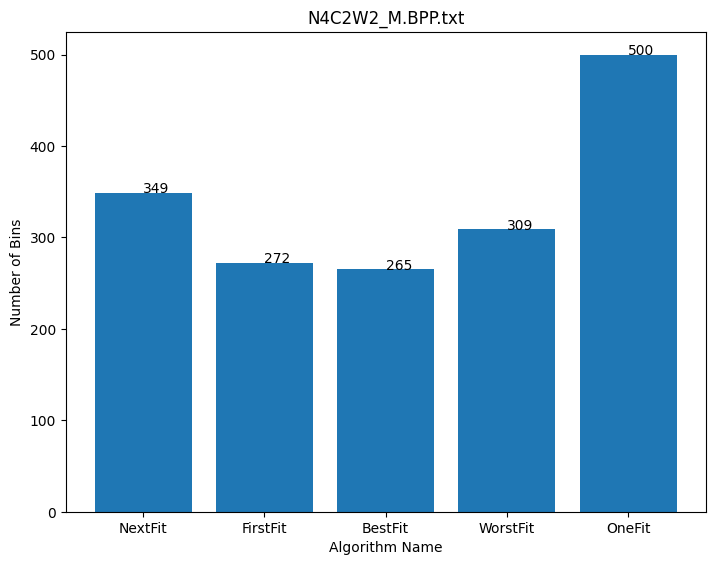

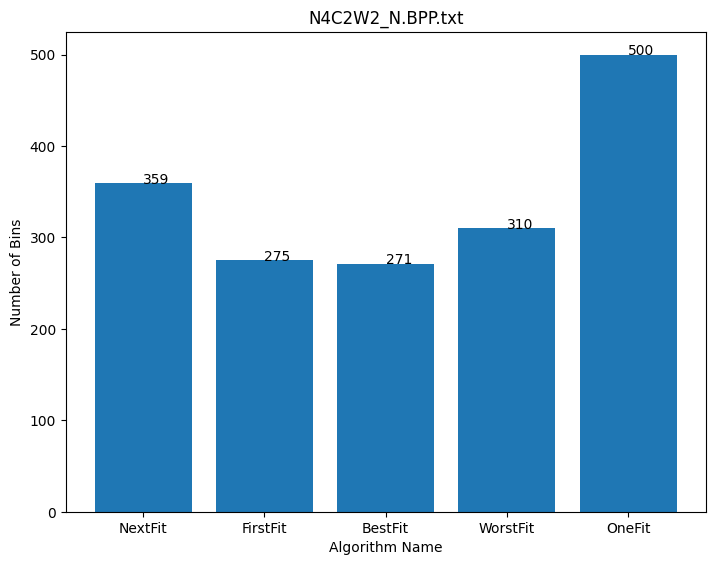

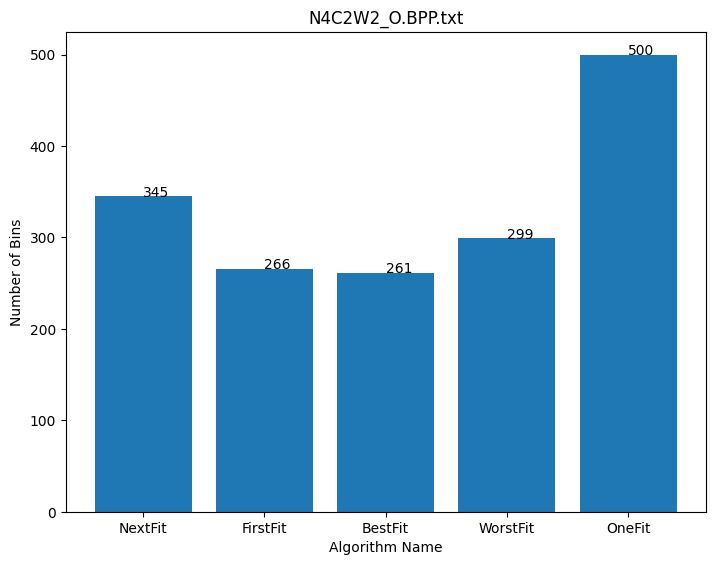

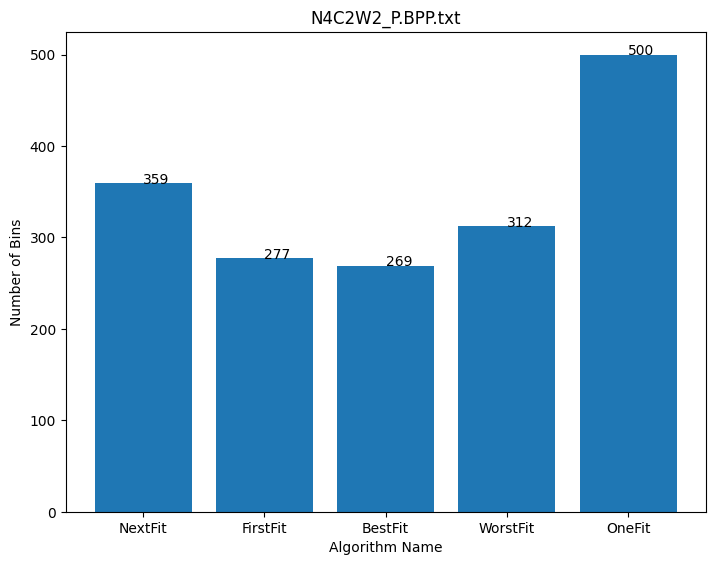

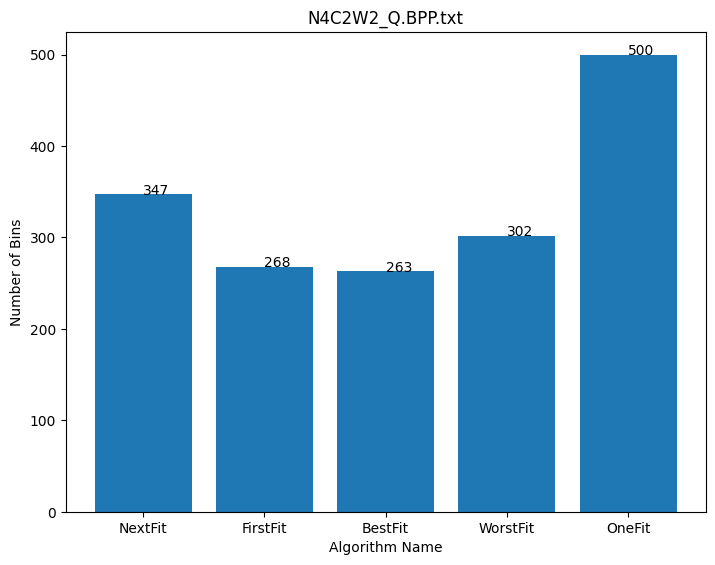

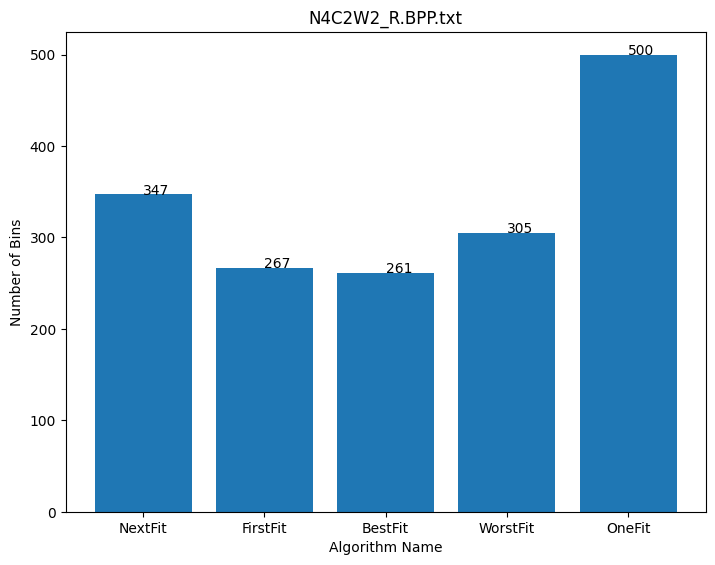

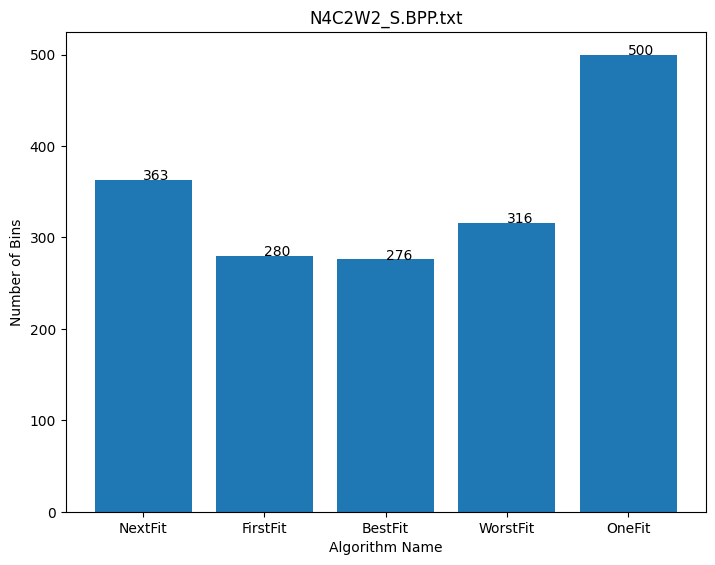

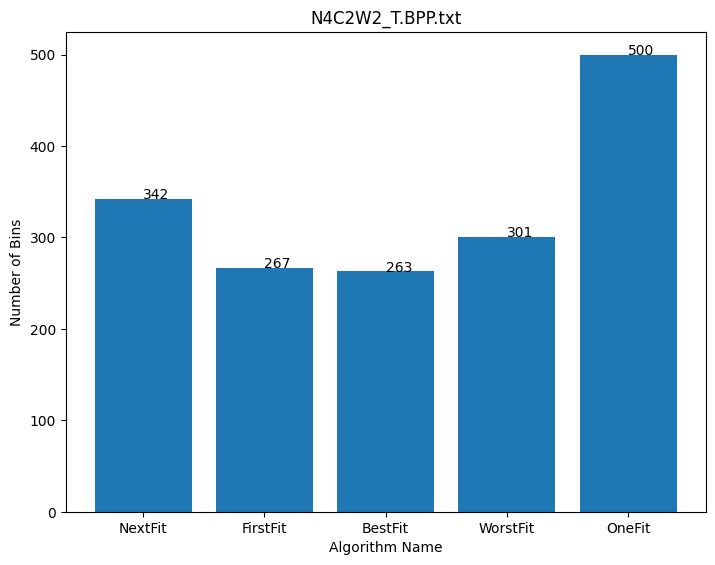

Benchmarking for Offline Algorithms:


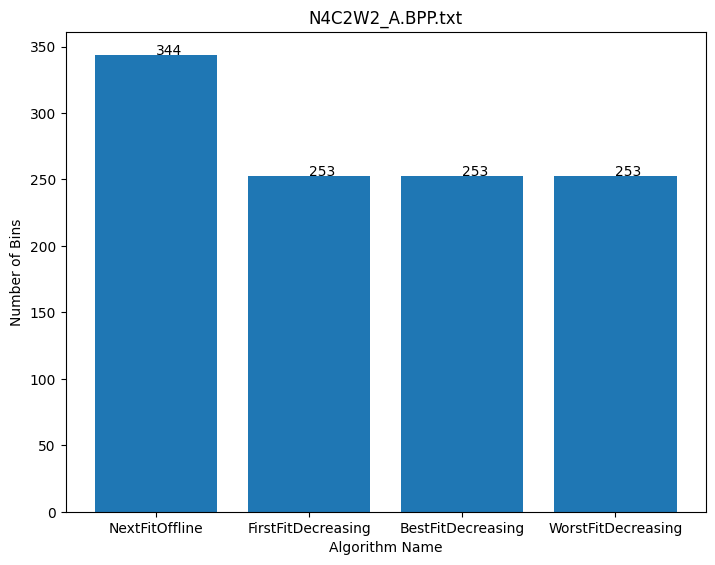

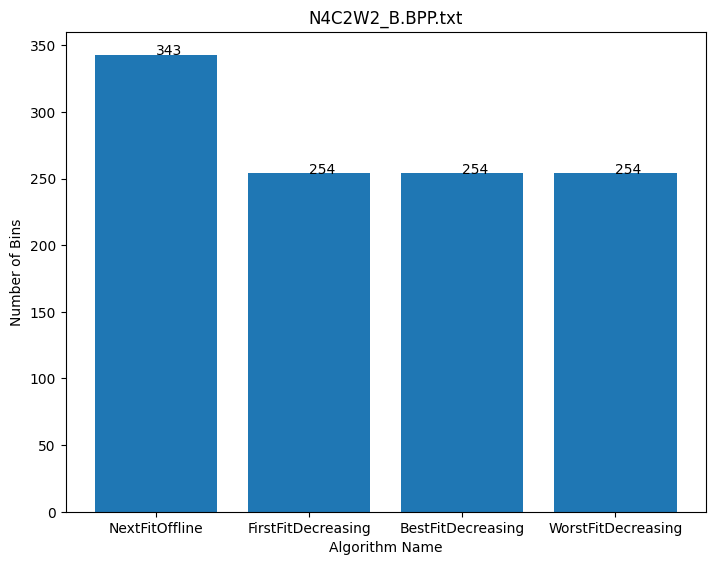

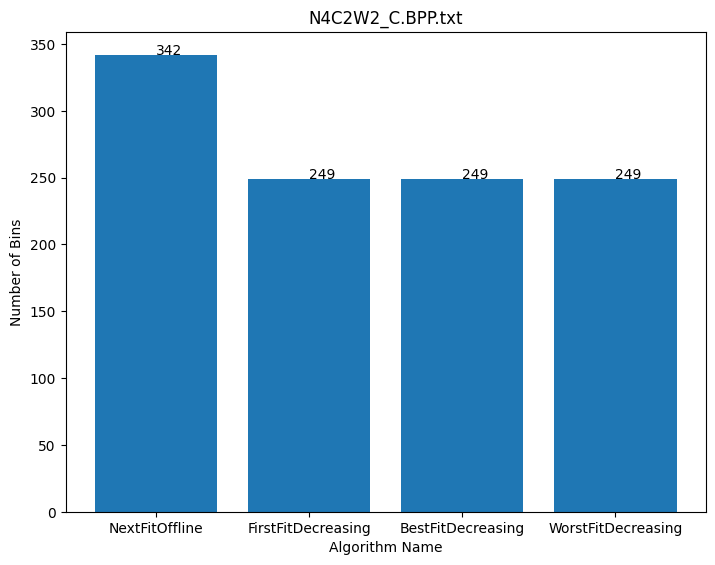

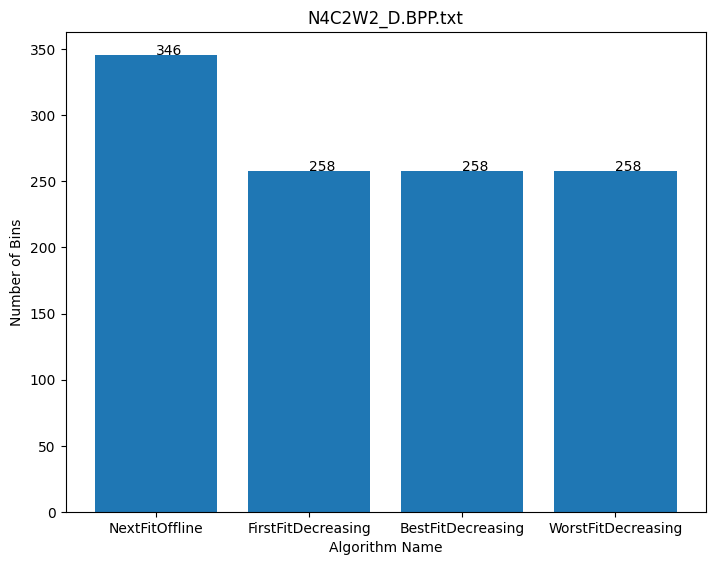

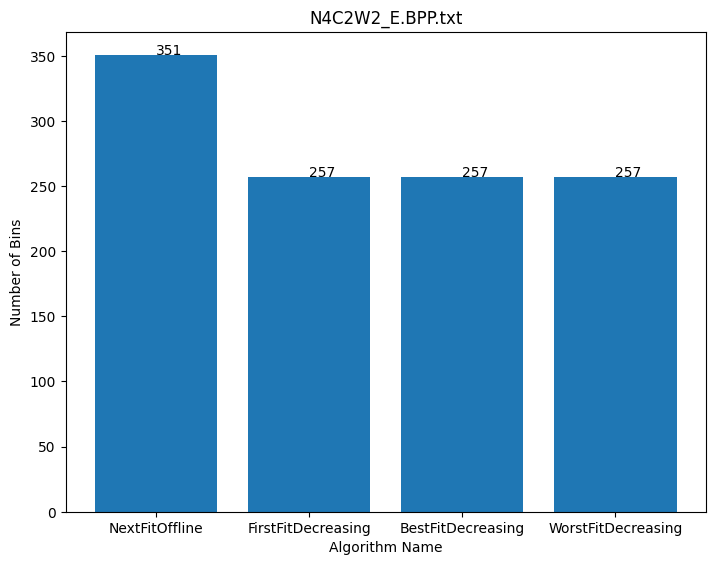

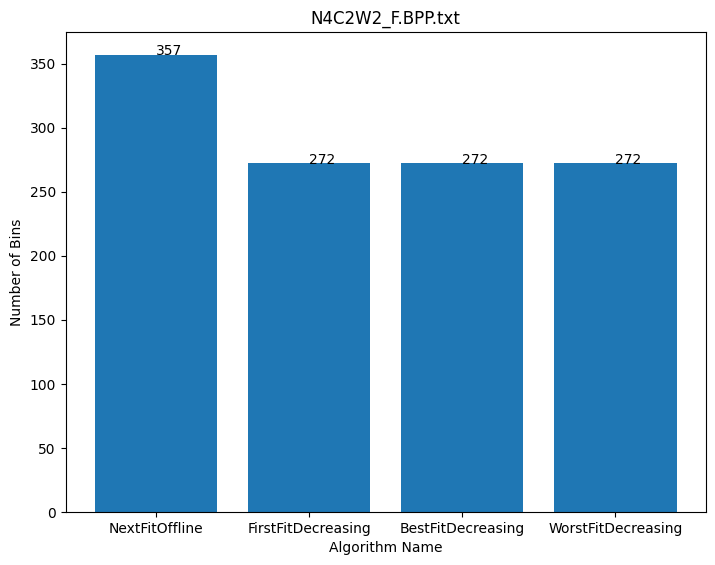

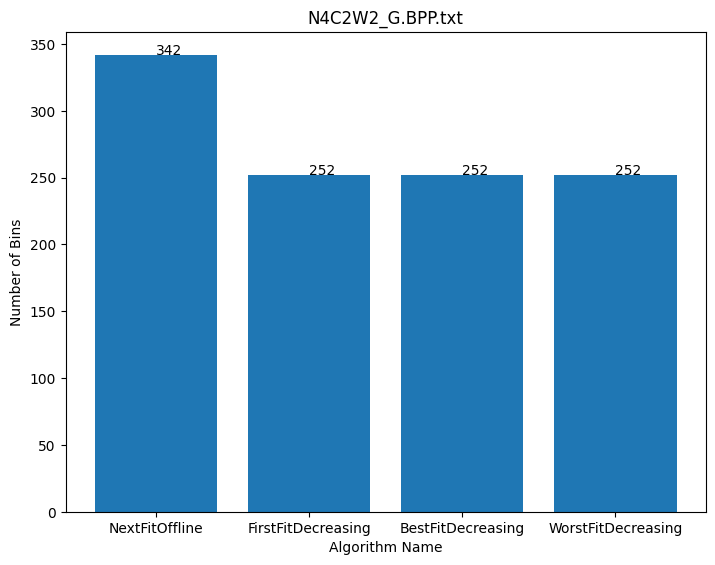

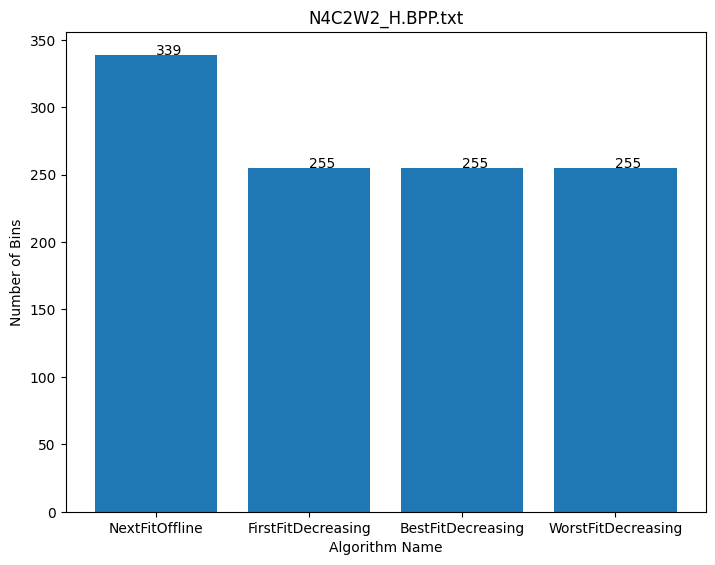

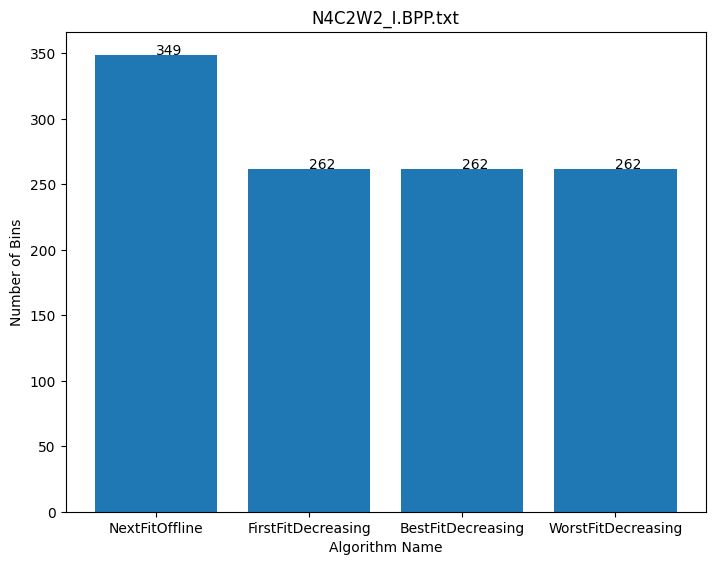

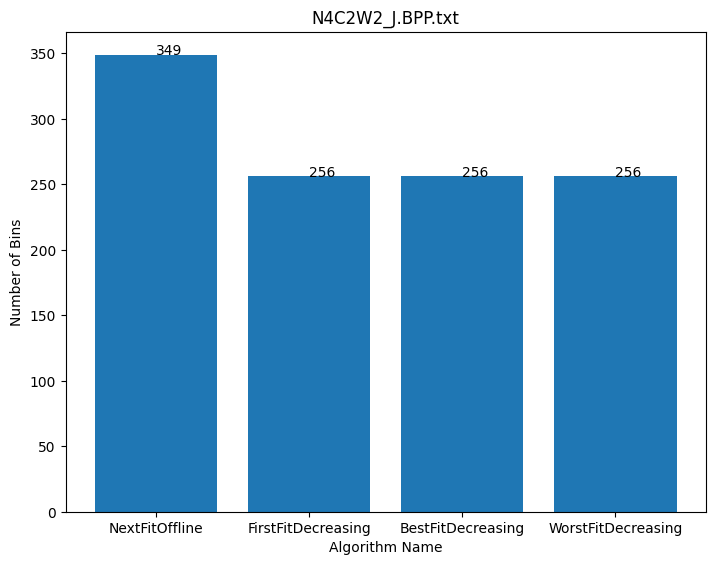

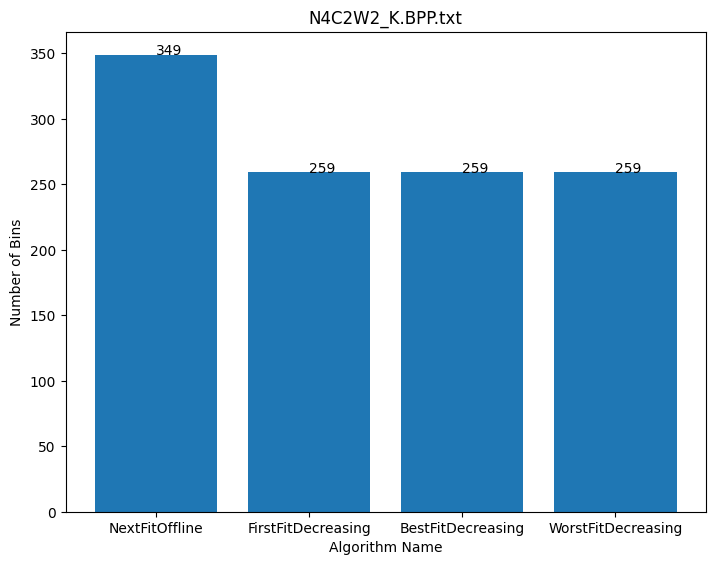

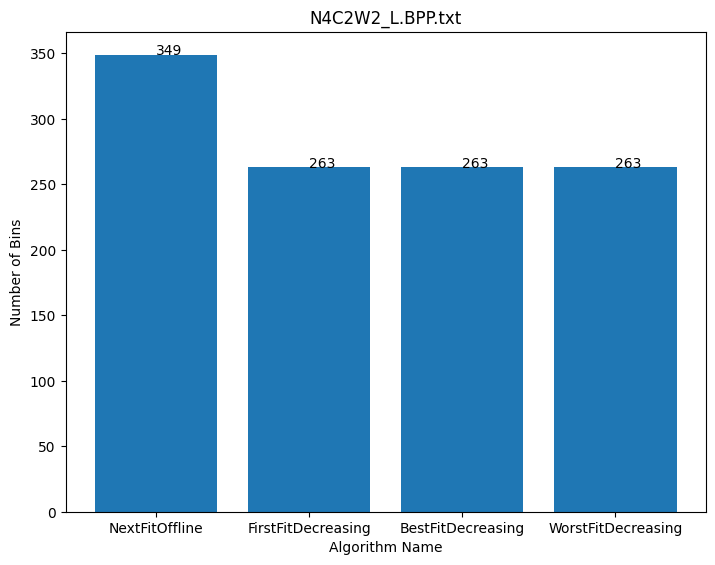

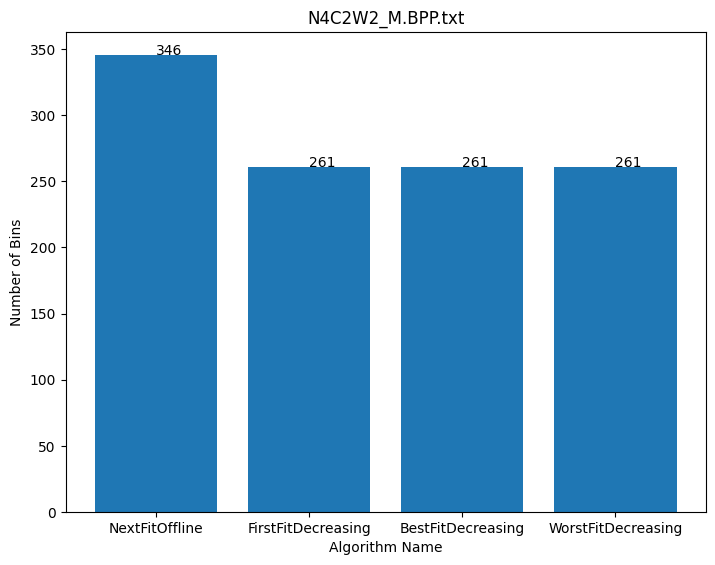

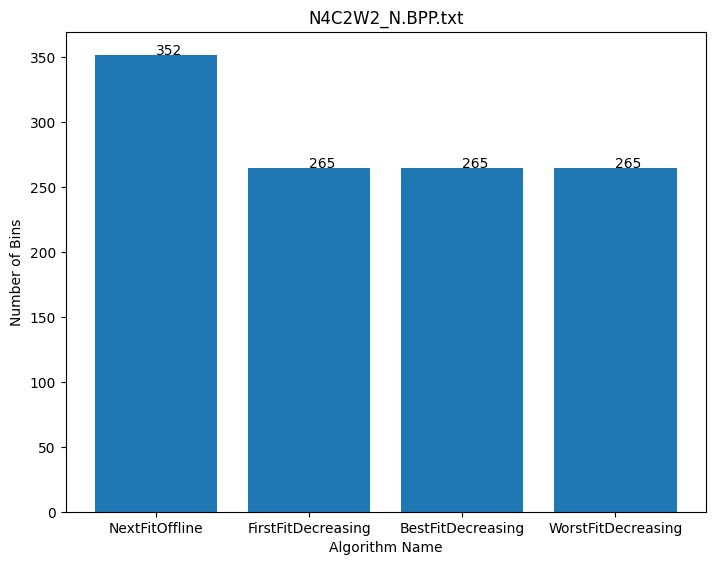

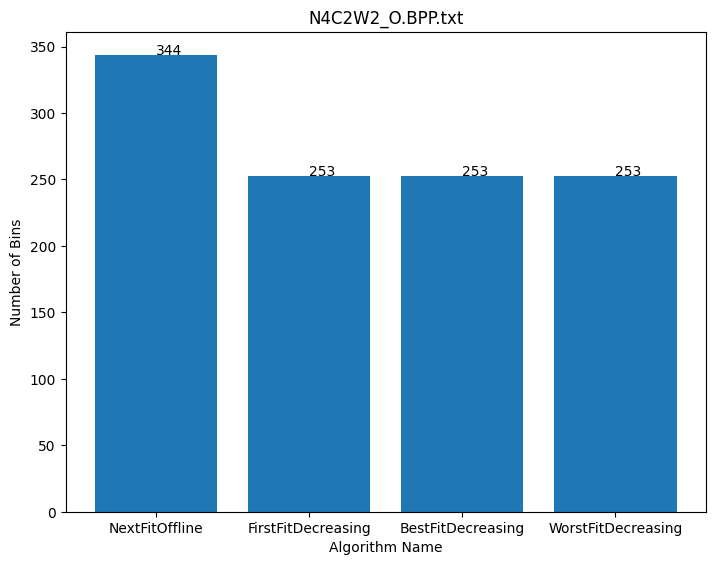

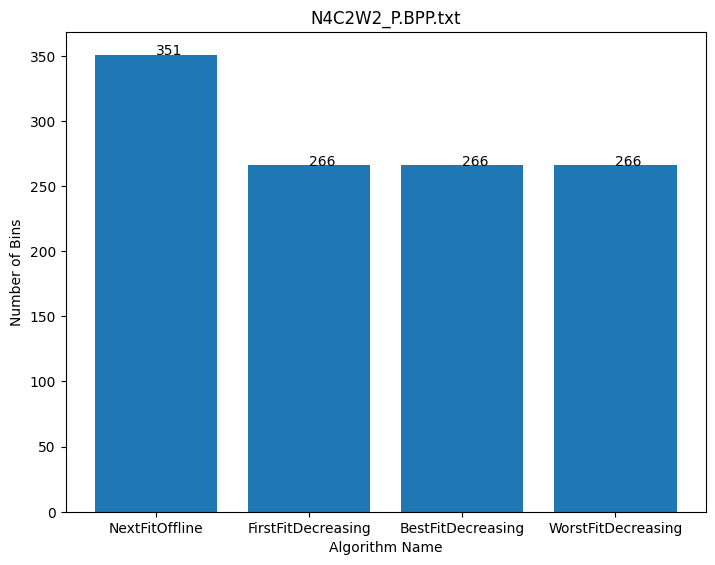

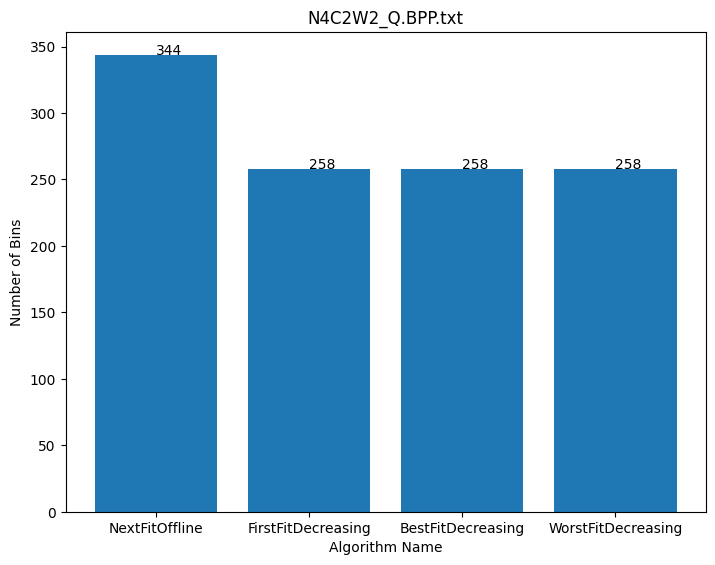

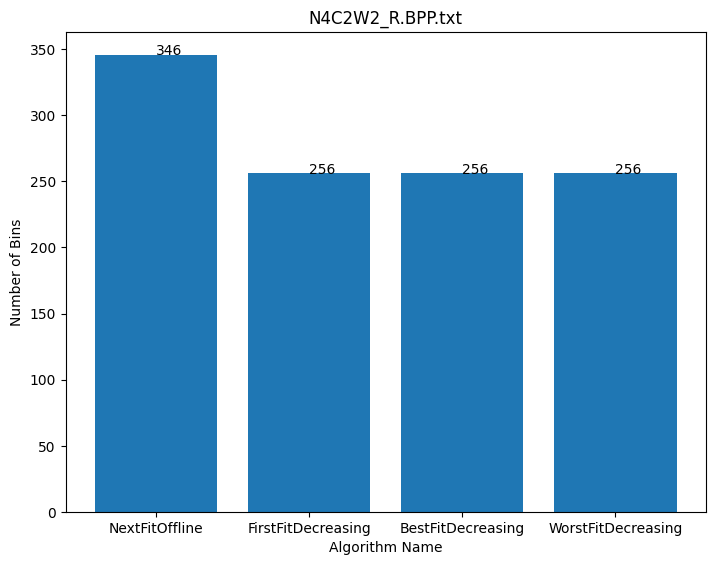

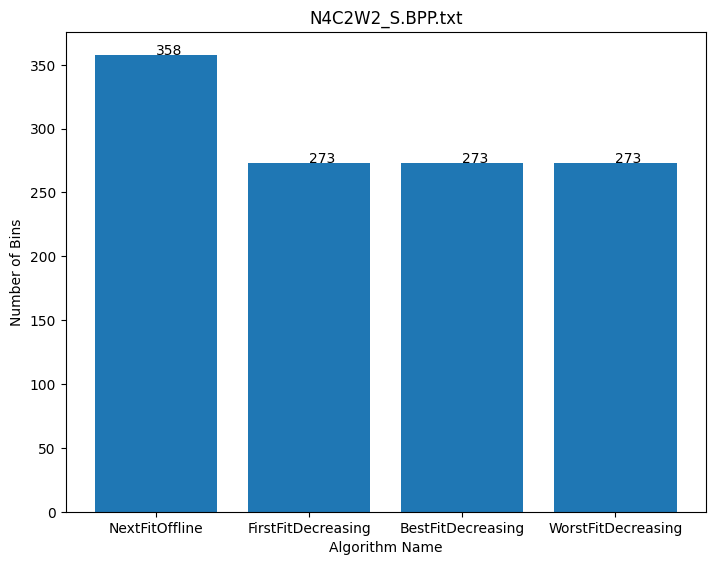

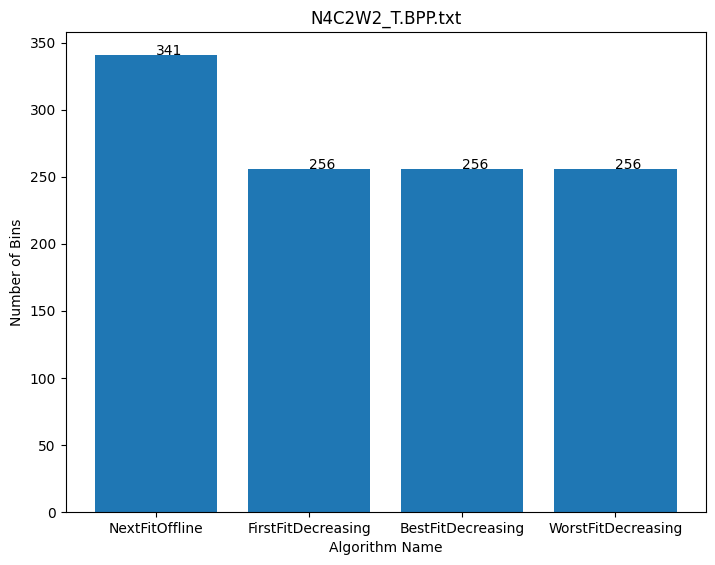

In [14]:
import numbins_bench
numbins_bench.main()

###### Analysis

Overall, for the online algorithms it displays that the BestFit algorithm has the least number of bins followed by FirstFit, WorstFit, NextFit then OneFit. This makes the most sense as BestFit ensures that the weights are place in the bins to minimize the amount of space. OneFit will have as many bins as the capacity. All the values here are different because online algorithms do not gaurantee the best solution. 

##### Using pyperf, implement benchmarks to measure the execution time of your different implementations. Your report must mention which part of the dataset you used for benchmarking, and why is your benchmarking protocol relevant.

In [15]:
from time_bench import BenchmarkSpace

from macpacking.algorithms.online import NextFit, FirstFit, BestFit, WorstFit, OneFit
from macpacking.algorithms.offline import NextFit as NextFitDesc, FirstFit as FirstFitDesc, BestFit as BestFitDesc, WorstFit as WorstFitDesc

online_algorithms = [NextFit(), FirstFit(), BestFit(), WorstFit(), OneFit()]
offline_algorithms = [NextFitDesc(), FirstFitDesc(), BestFitDesc(), WorstFitDesc()]
num_weights = [50, 100, 200, 500]
capacity = [100, 120, 150]

algo_space_on = BenchmarkSpace(online_algorithms, num_weights, capacity, "Online")
algo_space_off = BenchmarkSpace(offline_algorithms, num_weights, capacity, "Offline")

###### Plotting Online Benchmark to Measure Execution Time

In [16]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/time_bench_on.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [17]:
Context = tuple[str, str, str]        ## (strategy, num_weights, capacity)
Observations = dict[Context, list[float]] 

In [18]:
def extract_observations(bench_file: str) -> Observations:
    suite = BenchmarkSuite.load(bench_file)
    result = {}
    for bench in suite.get_benchmarks():
        context = tuple(bench.get_name().split('-')[1:])
        observations = list(bench.get_values())
        result[context] = observations
    return result

In [19]:
obs = extract_observations(bench_datafile)

In [20]:
from matplotlib import pyplot as plt
from statistics import mean

In [21]:
def prettyfy_plot(fig, axes, w: int, h: int):
    for ax in axes.flat:
        ax.label_outer()
    fig.set_size_inches(w, h)
    fig.tight_layout()

In [22]:
def plot_time_against_nb_weights(obs: Observations, num_weights: list[int], algorithms: list[str], capacity: int, canvas):
    observed = { k: mean(o) * 1000 for k, o in obs.items() } ## We are plotting the avg execution time in ms
    x_series = num_weights
    for algo in algorithms:
        # Extracting the y values associated to the x series
        y_series = list(map(lambda e: observed[(algo, str(e), str(capacity))], num_weights))
        canvas.plot(x_series, y_series, label = algo, linestyle='--', marker='o')
    canvas.set_title(f'capacity={capacity}')
    canvas.set(xlabel='num_weights', ylabel='avg time(ms)')
    canvas.legend()

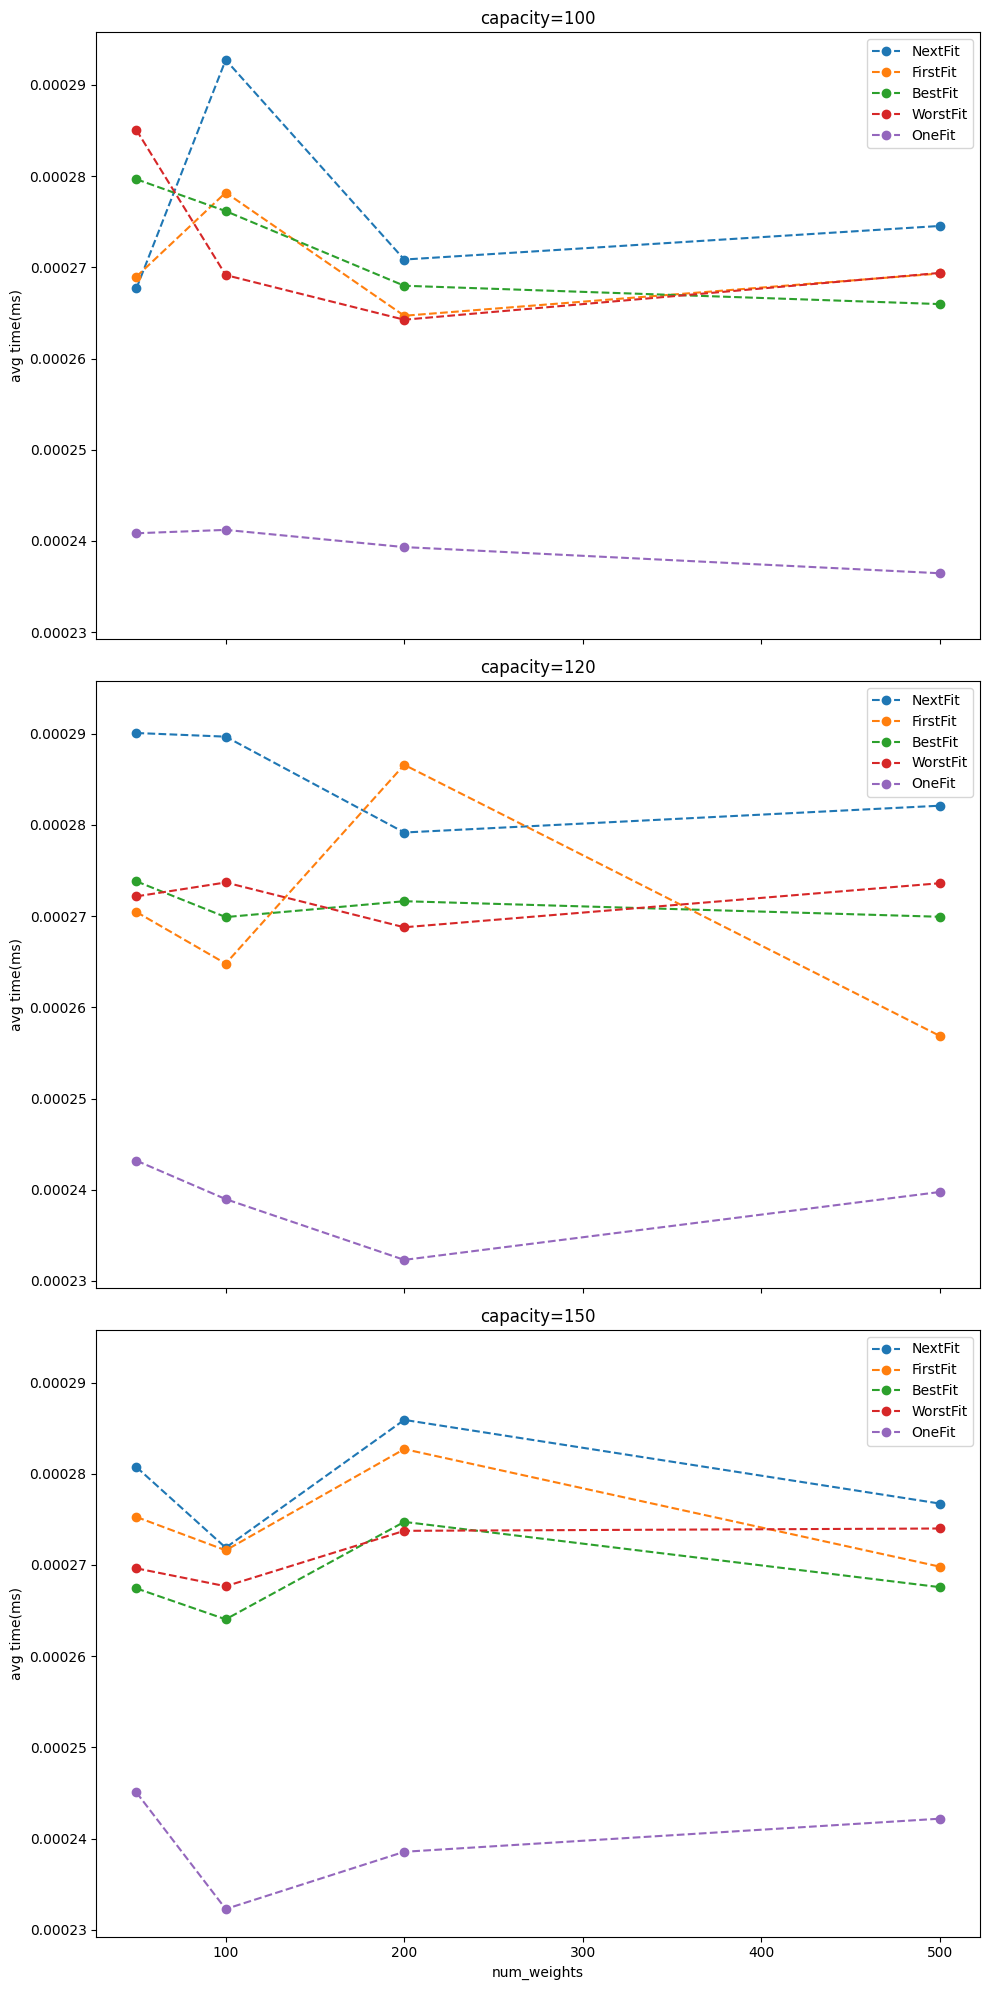

In [23]:
from itertools import product

algorithms = ['NextFit', 'FirstFit', 'BestFit', 'WorstFit', 'OneFit']
num_weights = [50, 100, 200, 500]
capacity = [100, 120, 150]

fig, axes = plt.subplots(3,1, sharex = True, sharey=True)
for x in range(3):  
    plot_time_against_nb_weights(obs, num_weights, algorithms, capacity[x], axes[x])
    
prettyfy_plot(fig, axes, w = 10, h = 20)

###### Plotting Offline Benchmark to Measure Execution Time

In [24]:
bench_datafile = 'outputs/time_bench_off.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [25]:
Context = tuple[str, str, str]        ## (strategy, num_weights, capacity)
Observations = dict[Context, list[float]] 

In [26]:
obs = extract_observations(bench_datafile)

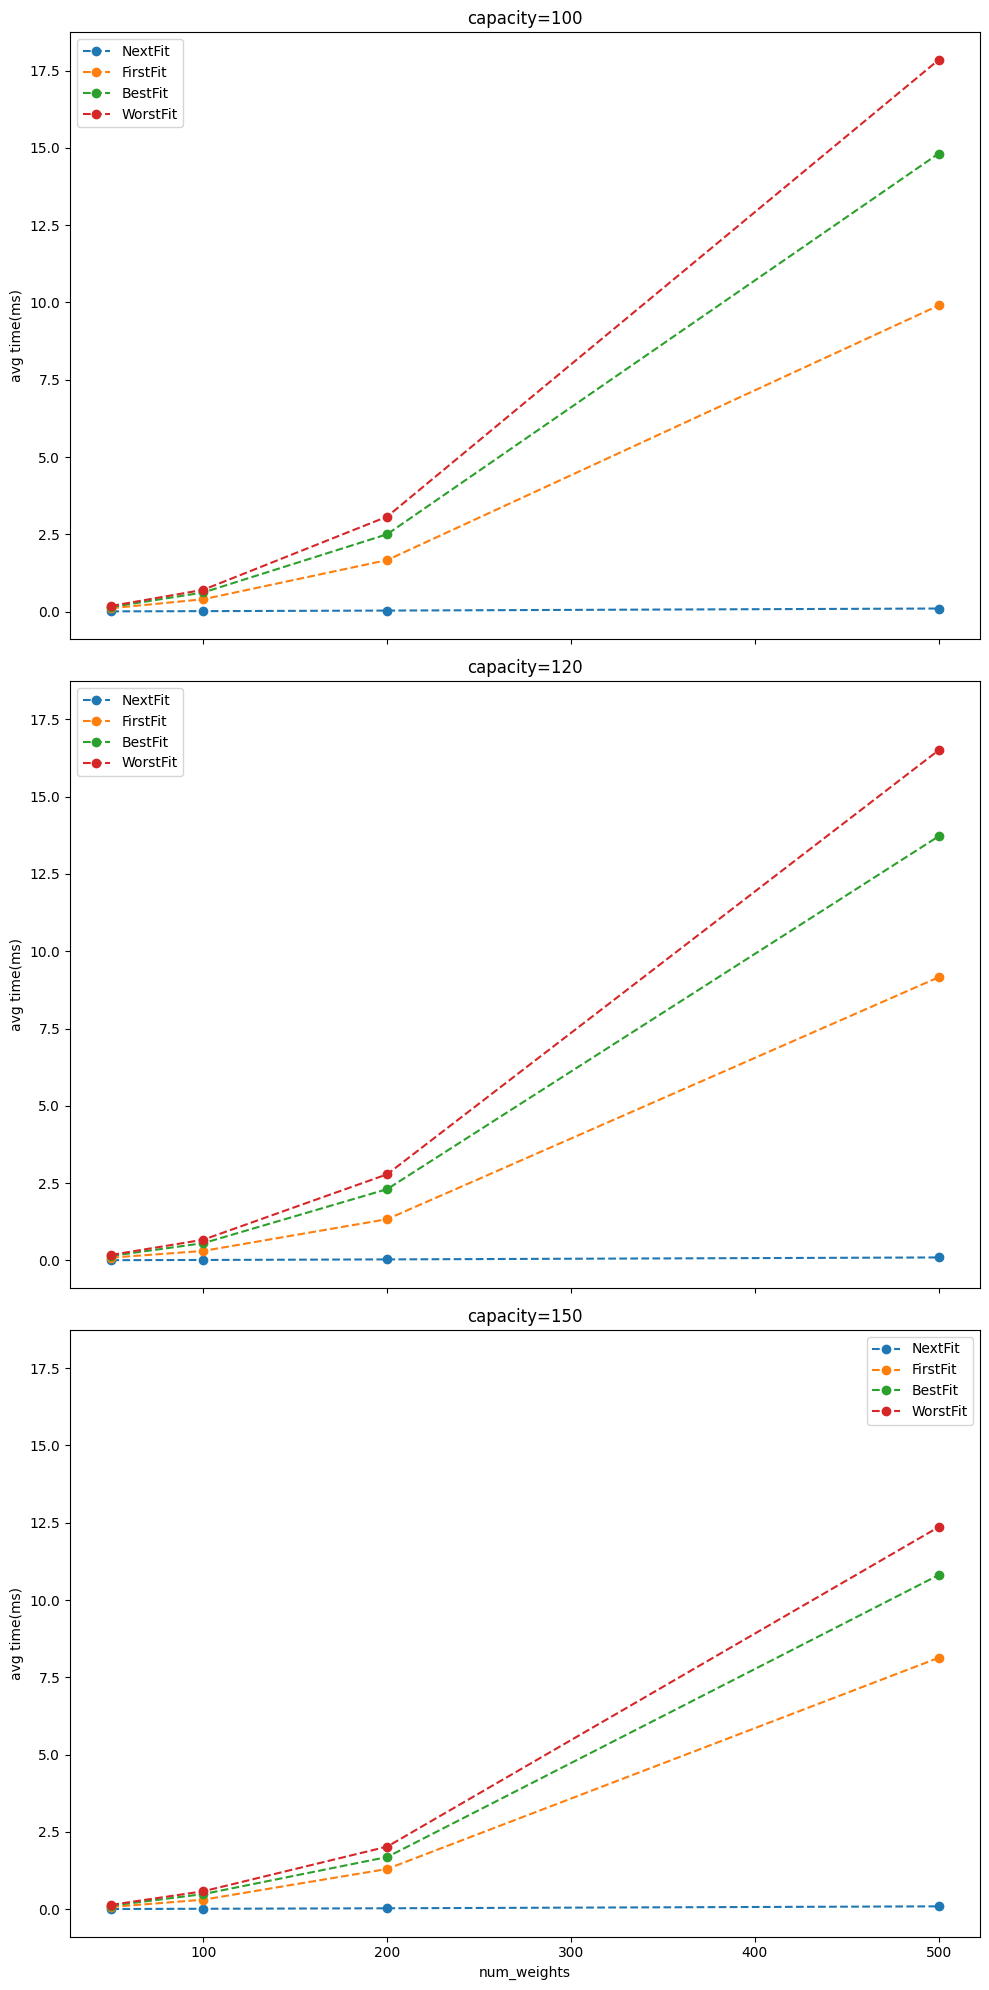

In [27]:
from itertools import product

algorithms = ['NextFit', 'FirstFit', 'BestFit', 'WorstFit']
num_weights = [50, 100, 200, 500]
capacity = [100, 120, 150]

fig, axes = plt.subplots(3,1, sharex = True, sharey=True)
for x in range(3):  
    plot_time_against_nb_weights(obs, num_weights, algorithms, capacity[x], axes[x])
    
prettyfy_plot(fig, axes, w = 10, h = 20)

###### Analysis

To benchmark this data, rather than measuring the execution time for a single number of weights and capacities, we measured multiple different numbers of weights and capacities. This allows us to see how the algorithms act given a certain weight and capacity. Therefore, the dataset that the benchmark uses contains files:

cases = N1C1W1_A.BPP.txt, N1C2W1_A.BPP.txt, N1C3W1_A.BPP.txt, N2C1W1_A.BPP.txt, N2C2W1_A.BPP.txt, N2C3W1_A.BPP.txt, N3C1W1_A.BPP.txt, N3C2W1_A.BPP.txt, N3C3W1_A.BPP.txt, N4C1W1_A.BPP.txt, N4C2W1_A.BPP.txt, N4C3W1_A.BPP.txt

These cover the cases when the number of weights = [50, 100, 200, 500] and capacity = [100, 120, 150]. 

This benchmarking protocol is relevant as it measures the execution time for each algorithm against the number of weights. The graphs can display the performance of each algorithm as well. 

The reason why the benchmarking graphs for online and offline have been separated is that the execution time between the two algorithms is drastically different. Hence, we separated the graphs to allow us to see the data better. From what we observed we saw that the online algorithms have a much lower execution time compared to the offline algorithms. This makes sense since the online algorithm sorts the weights as they appear in the stream, while the offline algorithms must first take the weights, sort them and then sort them into the bins. In addition, the online algorithms do not guarantee that the given solution is the most optimal one. 

The KPIs we used to test the benchamrk was the number of weights and the capacity. When comparing the offline algorithms, all agorithms except for NextFit is exponential regardless of the capacity. NextFit is a linear. 

## T3: Tasks

##### Implement an experiment that compares all your algorithms and the provided baseline with the optimal number stored in the oracle.xslx file (you can transform these data into CSV file for example).

Comparison Results are found in experiment_res.csv

##### Measure the margin of improvement with respect to the optimal solution. Plot your results, and analyse it

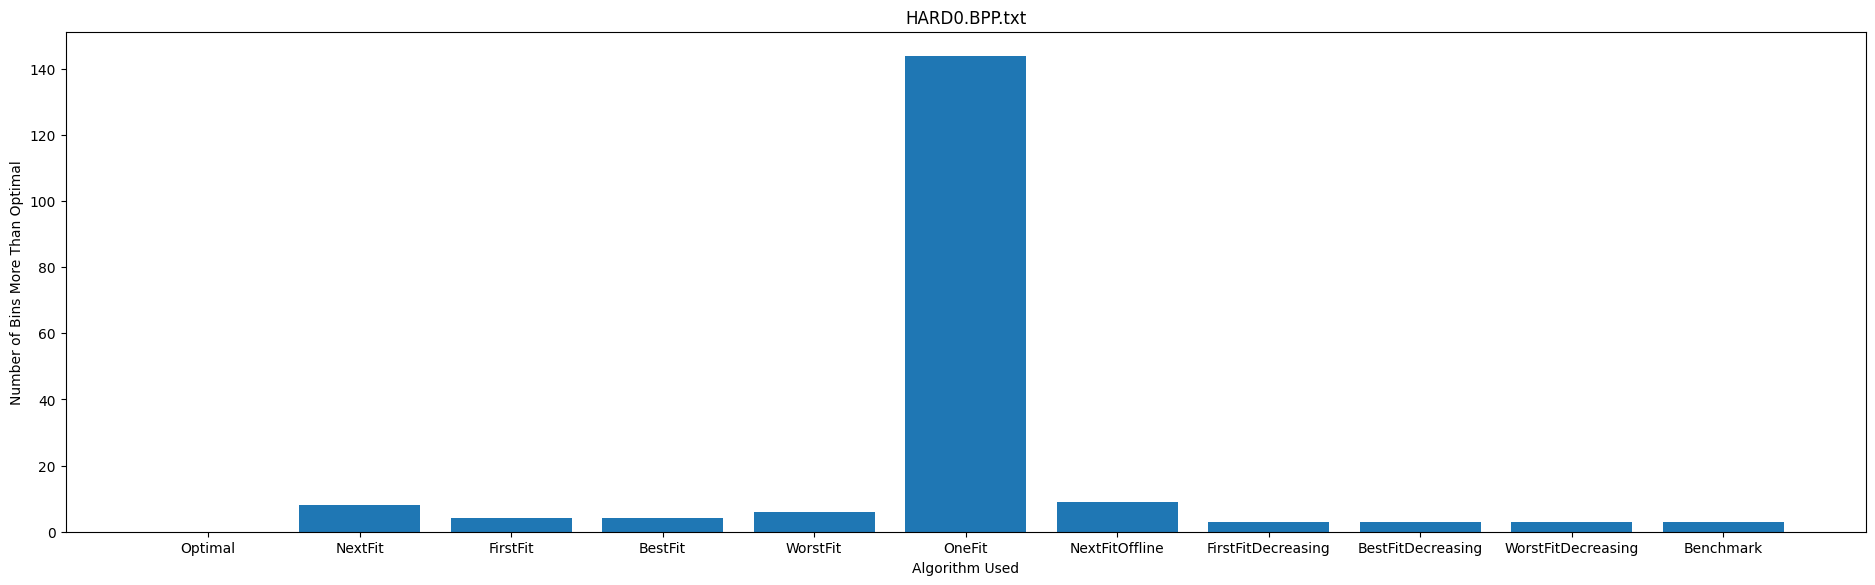

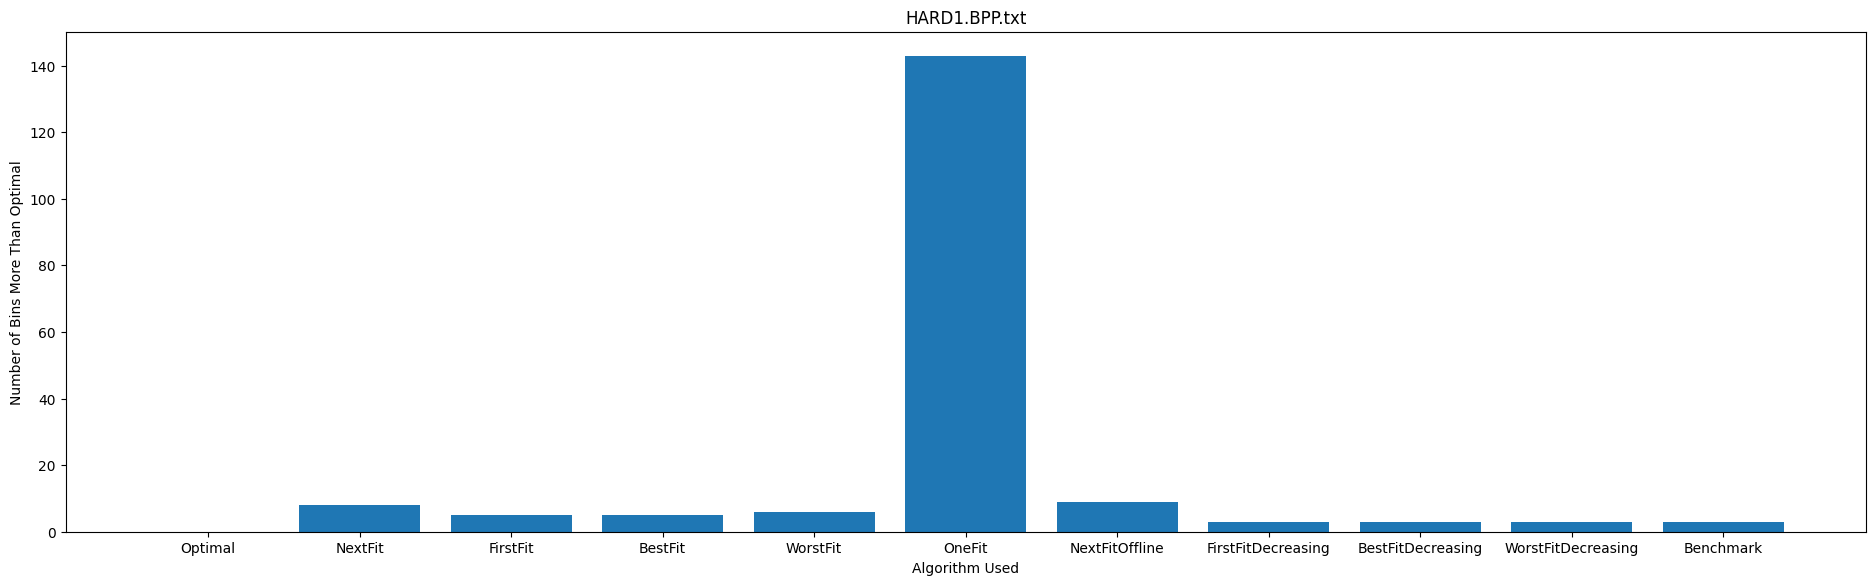

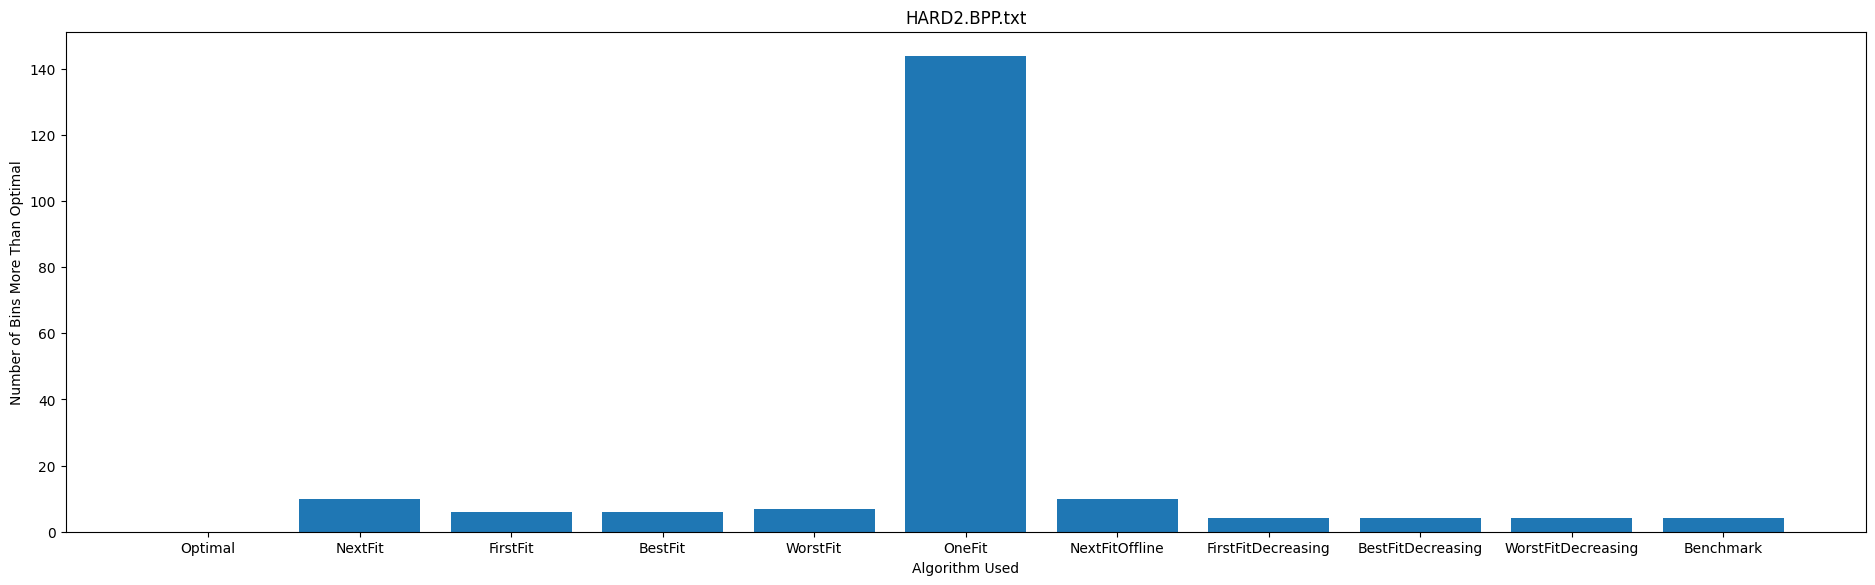

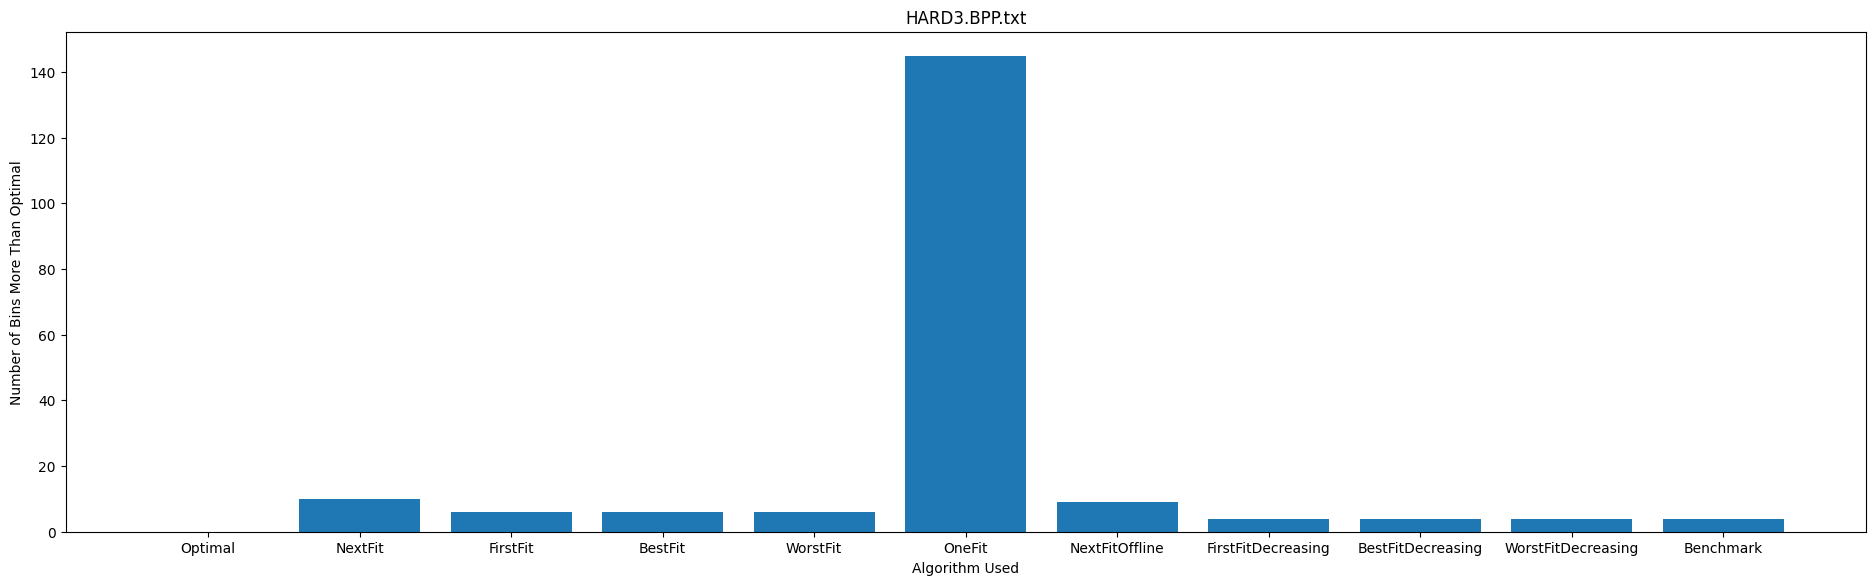

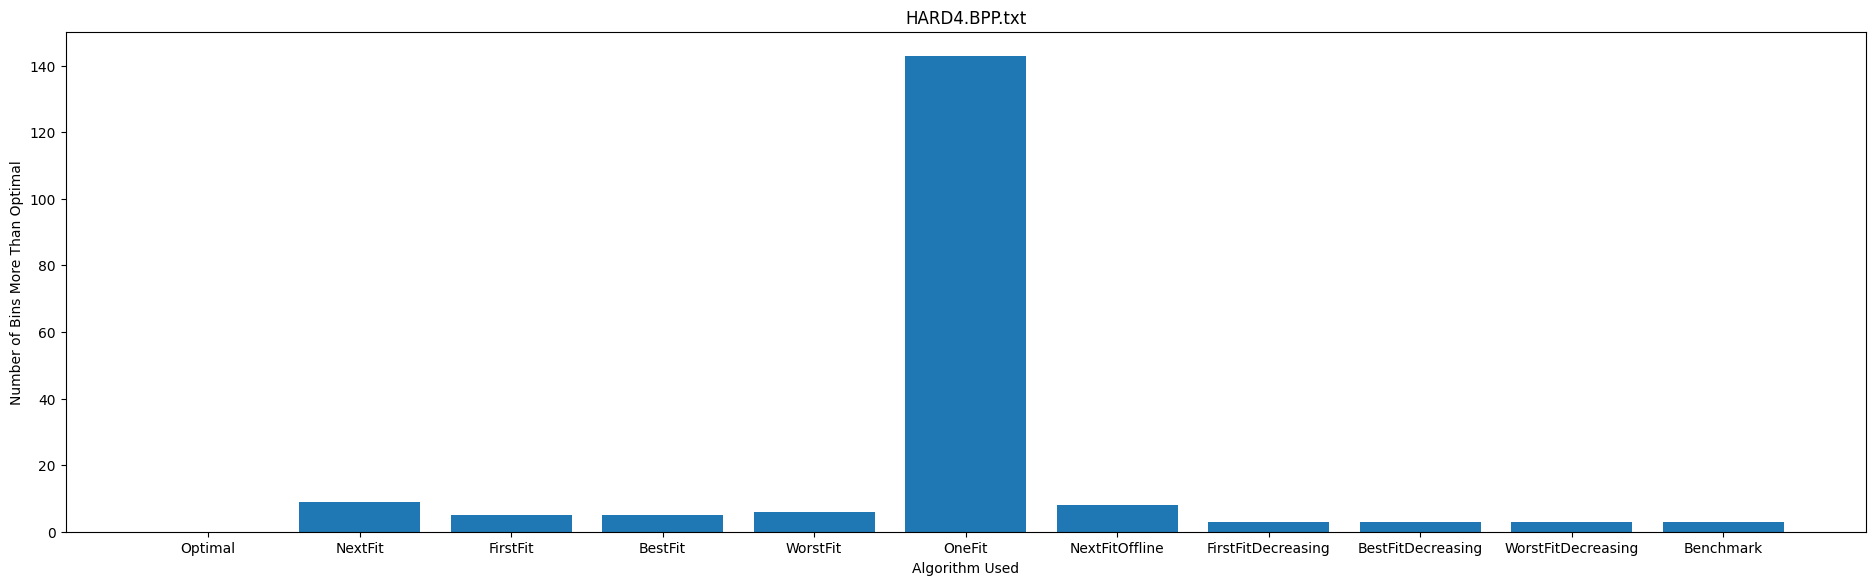

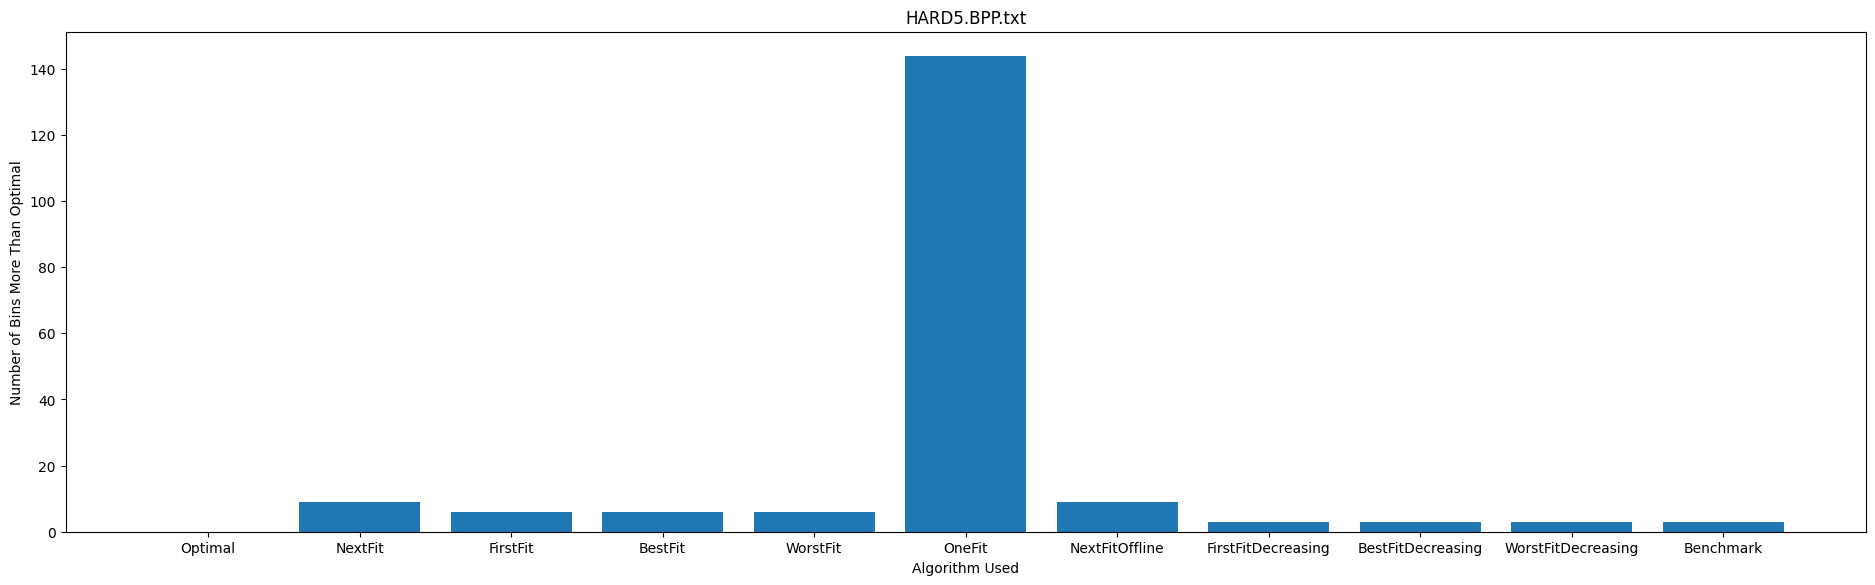

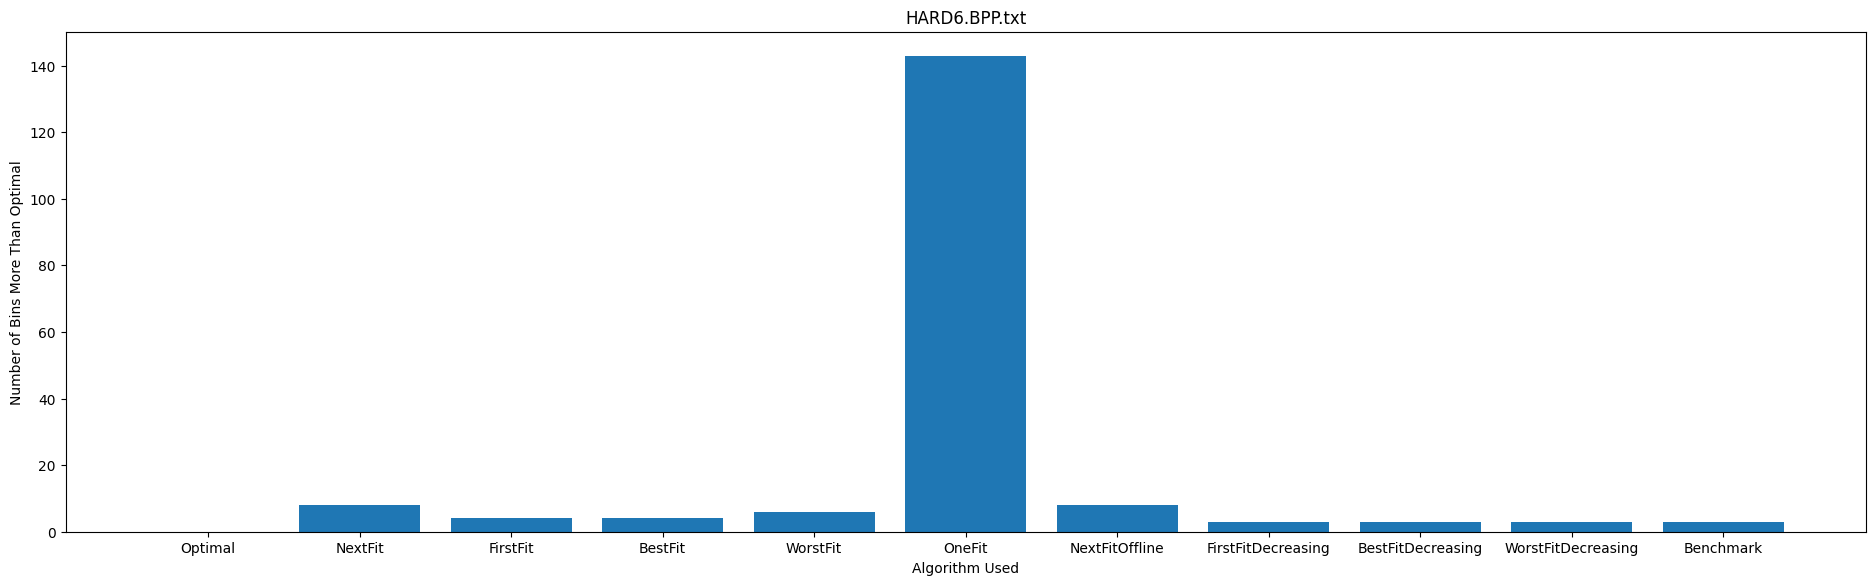

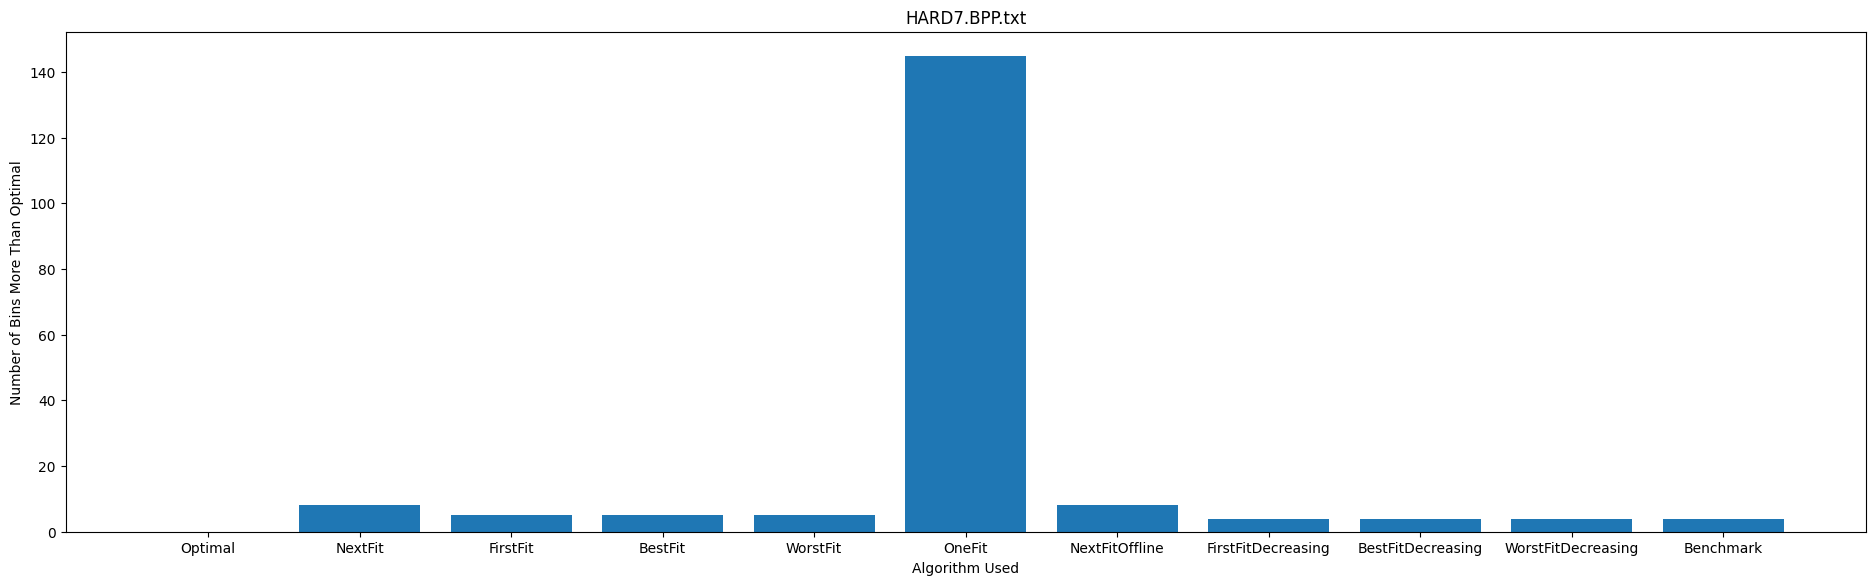

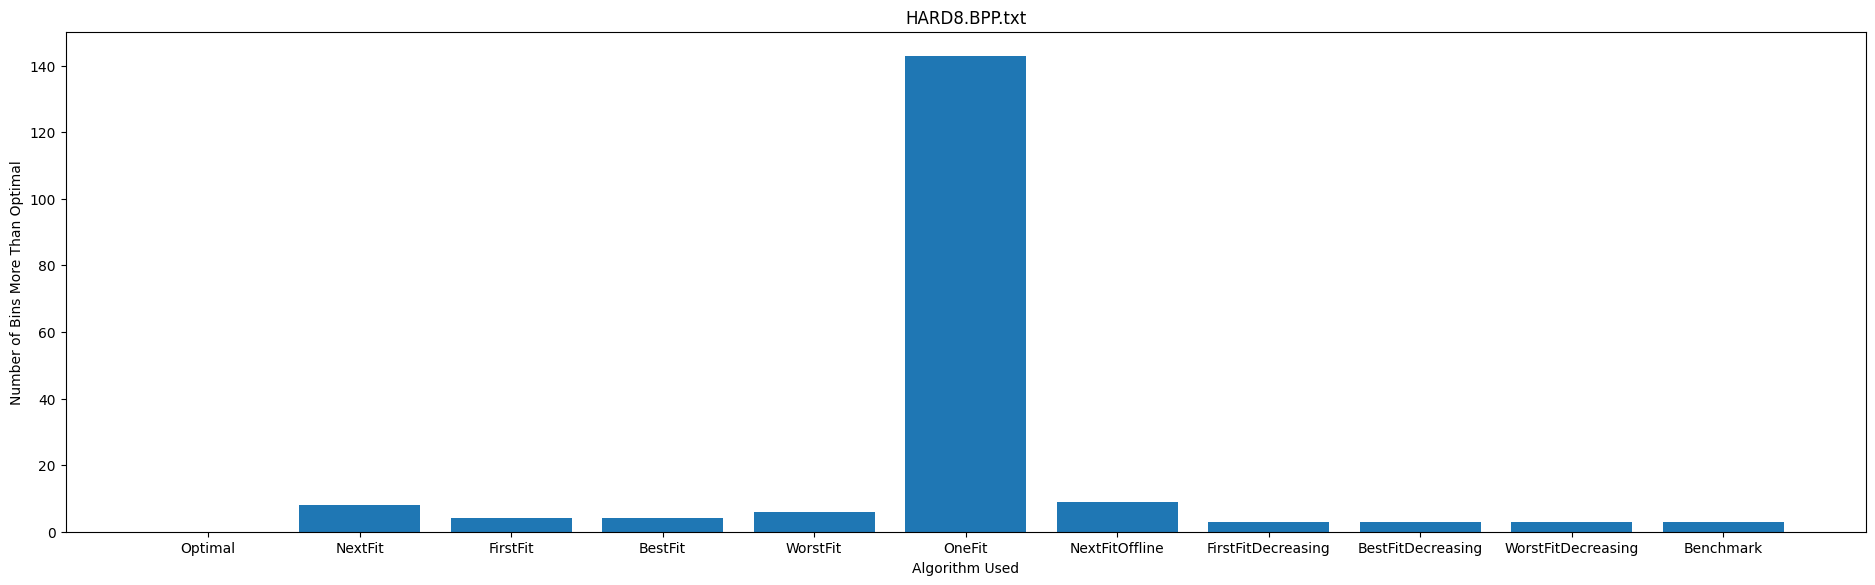

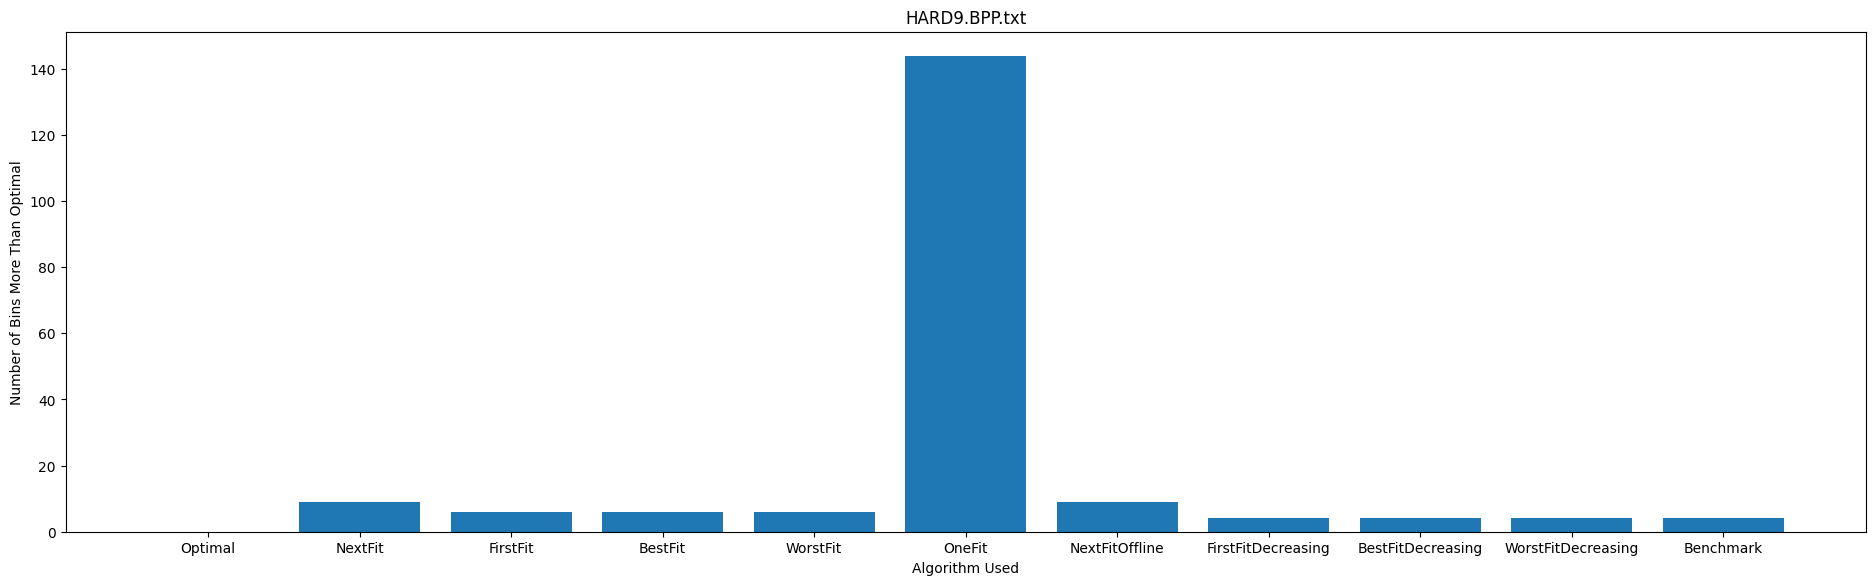

In [28]:
import experiment_moi as em
em.main()

###### Analysis

# TANVEER PUT UR T3 ANALYSIS HERE!!!!!!

## T4: Tasks

## T5: Tasks

##### Modify the macpacking library to support this new variant of the problem

In [29]:
from macpacking.reader import BinppPartitionReader
from macpacking.model import Partition
import macpacking.partitioning_algorithms.baseline as baseline

In [30]:
dataset = '_datasets/binpp/N3C2W1/N3C2W1_B.BPP.txt'
reader: DatasetReader = BinppPartitionReader(dataset, 10)
print(f'Dataset: {dataset}')
print(f'  - Num Bins: {reader.partition()[0]}')
print(f'  - Objects to pack: {sorted(reader.partition()[1])}')

Dataset: _datasets/binpp/N3C2W1/N3C2W1_B.BPP.txt
  - Num Bins: 10
  - Objects to pack: [1, 1, 1, 2, 3, 4, 4, 5, 5, 7, 8, 9, 9, 9, 9, 9, 9, 9, 10, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 19, 19, 19, 19, 19, 20, 21, 21, 22, 22, 23, 23, 23, 23, 24, 24, 25, 25, 27, 27, 30, 30, 30, 31, 33, 33, 34, 34, 34, 35, 35, 36, 37, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 42, 43, 43, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 48, 48, 49, 49, 50, 50, 50, 50, 51, 51, 52, 53, 55, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 58, 58, 60, 60, 60, 60, 61, 62, 63, 63, 63, 65, 65, 65, 66, 66, 66, 66, 66, 67, 68, 68, 68, 68, 70, 71, 72, 72, 72, 72, 73, 75, 76, 76, 76, 77, 77, 77, 77, 78, 79, 79, 79, 80, 80, 80, 81, 81, 82, 83, 86, 87, 87, 87, 88, 89, 89, 89, 90, 90, 90, 92, 93, 93, 93, 94, 95, 95, 96, 96, 96, 97, 98, 99, 100, 100, 100, 100, 100]


##### Integrate a baseline by using the “to_constant_bin_number()” method available in the binpacking library

In [31]:
strategy: Partition = baseline.BenMaier()
result = strategy(reader.partition())
print(f'{sorted(result)}')

[[96, 95, 89, 79, 75, 72, 63, 60, 55, 51, 46, 45, 36, 34, 23, 23, 15, 14, 9, 1, 1], [96, 96, 87, 80, 76, 68, 66, 60, 56, 50, 47, 41, 39, 34, 24, 20, 17, 14, 9, 2], [97, 95, 87, 80, 76, 68, 66, 60, 56, 50, 47, 42, 39, 30, 27, 21, 17, 12, 9, 7], [98, 94, 87, 80, 76, 70, 65, 57, 57, 51, 48, 40, 39, 34, 24, 21, 17, 12, 10, 3], [99, 93, 88, 79, 77, 67, 66, 61, 55, 50, 48, 40, 39, 35, 23, 22, 15, 15, 8, 4], [100, 90, 89, 81, 72, 72, 65, 62, 55, 49, 48, 40, 39, 35, 23, 22, 16, 12, 12], [100, 90, 90, 79, 77, 68, 66, 58, 56, 52, 45, 45, 37, 30, 30, 19, 16, 13, 9, 4], [100, 92, 89, 78, 77, 68, 66, 58, 56, 53, 45, 43, 38, 31, 27, 19, 18, 13, 9, 5], [100, 93, 83, 82, 77, 71, 63, 63, 55, 49, 46, 43, 38, 33, 25, 19, 18, 14, 9, 1], [100, 93, 86, 81, 73, 72, 65, 60, 55, 50, 48, 40, 40, 33, 25, 19, 19, 12, 9, 5]]


##### Are your KPIs adequate to evaluate such new objective for a solution? More generally, what is reusable in your code to support this?

##### Implement at least one algorithm, and compare it with the baseline (benchmark, plot and analyse)

In [32]:
import macpacking.partitioning_algorithms.partition as partition

In [33]:
strategy: Partition = partition.GreedyNumberPartitioning()
result = strategy(reader.partition())
print(f'{sorted(result)}')

[[96, 95, 89, 79, 75, 72, 63, 60, 55, 51, 46, 45, 36, 34, 23, 23, 15, 14, 9, 1, 1], [96, 96, 87, 80, 76, 68, 66, 60, 56, 50, 47, 41, 39, 34, 24, 20, 17, 14, 9, 2], [97, 95, 87, 80, 76, 68, 66, 60, 56, 50, 47, 42, 39, 30, 27, 21, 17, 12, 9, 7], [98, 94, 87, 80, 76, 70, 65, 57, 57, 51, 48, 40, 39, 34, 24, 21, 17, 12, 10, 3], [99, 93, 88, 79, 77, 67, 66, 61, 55, 50, 48, 40, 39, 35, 23, 22, 15, 15, 8, 4], [100, 90, 89, 81, 72, 72, 65, 62, 55, 49, 48, 40, 39, 35, 23, 22, 16, 12, 12], [100, 90, 90, 79, 77, 68, 66, 58, 56, 52, 45, 45, 37, 30, 30, 19, 16, 13, 9, 4], [100, 92, 89, 78, 77, 68, 66, 58, 56, 53, 45, 43, 38, 31, 27, 19, 18, 13, 9, 5], [100, 93, 83, 82, 77, 71, 63, 63, 55, 49, 46, 43, 38, 33, 25, 19, 18, 14, 9, 1], [100, 93, 86, 81, 73, 72, 65, 60, 55, 50, 48, 40, 40, 33, 25, 19, 19, 12, 9, 5]]


In [34]:
from partition_bench import BenchmarkSpace

from macpacking.partitioning_algorithms.baseline import BenMaier
from macpacking.partitioning_algorithms.partition import GreedyNumberPartitioning

algorithms = [GreedyNumberPartitioning(), BenMaier()]
num_weights = [50, 100, 200, 500]
num_bins = [10, 20, 40]

algo_space = BenchmarkSpace(algorithms, num_weights, num_bins)

In [35]:
bench_datafile = 'outputs/partition_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [36]:
Context = tuple[str, str, str]        ## (strategy, num_weights, num_bins)
Observations = dict[Context, list[float]] 

In [37]:
obs = extract_observations(bench_datafile)

In [38]:
def plot_time_against_nb_weights_partition(obs: Observations, num_weights: list[int], algorithms: list[str], num_bins: int, canvas):
    observed = { k: mean(o) * 1000 for k, o in obs.items() } ## We are plotting the avg execution time in ms
    x_series = num_weights
    for algo in algorithms:
        # Extracting the y values associated to the x series
        y_series = list(map(lambda e: observed[(algo, str(e), str(num_bins))], num_weights))
        canvas.plot(x_series, y_series, label = algo, linestyle='--', marker='o')
    canvas.set_title(f'num bins={num_bins}')
    canvas.set(xlabel='num_weights', ylabel='avg time(ms)')
    canvas.legend()

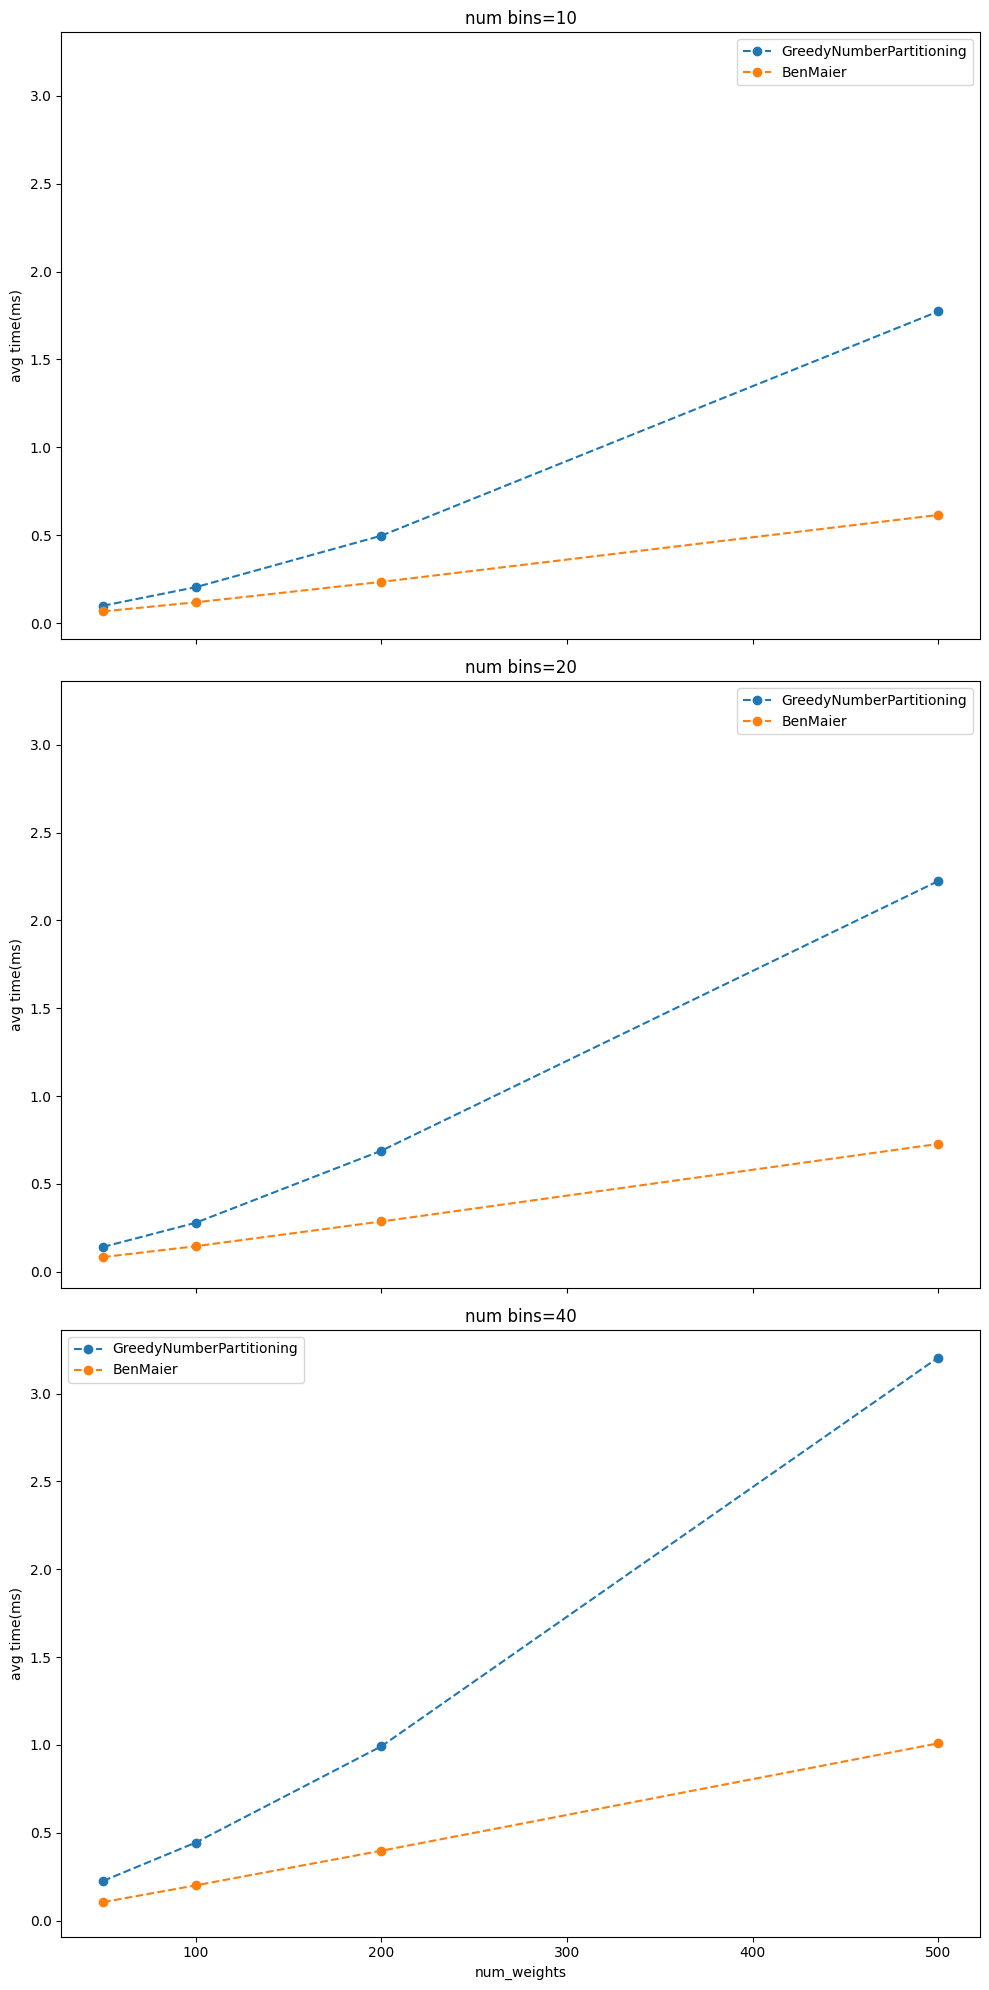

In [39]:
from itertools import product

algorithms = ['GreedyNumberPartitioning', 'BenMaier']
num_weights = [50, 100, 200, 500]
num_bins = [10, 20, 40]

fig, axes = plt.subplots(3,1, sharex = True, sharey=True)
for x in range(3):  
    plot_time_against_nb_weights_partition(obs, num_weights, algorithms, num_bins[x], axes[x])
    
prettyfy_plot(fig, axes, w = 10, h = 20)

##### Compare these results with the one for the classical bin packing algorithms.